<a href="https://colab.research.google.com/github/5rangeclick/DL/blob/DAcrew/%EC%8B%A0%EC%9A%A9%EC%B9%B4%EB%93%9C_%EC%B5%9C%EC%A2%85%EB%AA%A8%EB%8D%B8_%EC%8B%A4%ED%97%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#불러오기

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import seaborn as sns
from collections import Counter
import numpy as np
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
train = pd.read_csv('/content/drive/MyDrive/raw data/open/train.csv')
train

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit
0,0,F,N,N,0,202500.0,Commercial associate,Higher education,Married,Municipal apartment,-13899,-4709,1,0,0,0,NaN,2.0,-6.0,1.0
1,1,F,N,Y,1,247500.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,-11380,-1540,1,0,0,1,Laborers,3.0,-5.0,1.0
2,2,M,Y,Y,0,450000.0,Working,Higher education,Married,House / apartment,-19087,-4434,1,0,1,0,Managers,2.0,-22.0,2.0
3,3,F,N,Y,0,202500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-15088,-2092,1,0,1,0,Sales staff,2.0,-37.0,0.0
4,4,F,Y,Y,0,157500.0,State servant,Higher education,Married,House / apartment,-15037,-2105,1,0,0,0,Managers,2.0,-26.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26452,26452,F,N,N,2,225000.0,State servant,Secondary / secondary special,Married,House / apartment,-12079,-1984,1,0,0,0,Core staff,4.0,-2.0,1.0
26453,26453,F,N,Y,1,180000.0,Working,Higher education,Separated,House / apartment,-15291,-2475,1,0,0,0,NaN,2.0,-47.0,2.0
26454,26454,F,Y,N,0,292500.0,Working,Secondary / secondary special,Civil marriage,With parents,-10082,-2015,1,0,0,0,Core staff,2.0,-25.0,2.0
26455,26455,M,N,Y,0,171000.0,Working,Incomplete higher,Single / not married,House / apartment,-10145,-107,1,0,0,0,Laborers,1.0,-59.0,2.0


In [10]:
# 분류 모델
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier


models = {
    'LR' : LogisticRegression(penalty='l2', solver='saga', multi_class='multinomial', max_iter=300, n_jobs=4),
    'SVC' : SVC(kernel='rbf', max_iter=-1, random_state=777),
    'KNC' : KNeighborsClassifier(n_neighbors=5, algorithm='kd_tree', n_jobs=4),
    'RFC' : RandomForestClassifier(n_estimators=300, random_state=777, n_jobs=4),
    # 'ABC' : AdaBoostClassifier(n_estimators=300, learning_rate=1.0, random_state=777),
    'GBC' : GradientBoostingClassifier(n_estimators=300, loss='log_loss', learning_rate=0.1, random_state=777, n_iter_no_change=5),
    'LGBM' : LGBMClassifier(n_estimators=300, boosting_type='gbdt', learning_rate=0.1, objective='multiclass', random_state=777, n_jobs=4),
    'XGB' : XGBClassifier(verbosity=0, num_parrell_tree=3),
}

# 초기 원본, 전처리 성능 확인

In [4]:
exp2 = train.drop(columns = 'FLAG_MOBIL') #인덱스는 삭제 안한다

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# occyp_type 열에 해당 결측치를 채워줍니다.
exp2['occyp_type'].fillna('Unknown', inplace=True)

# 모든 object 열을 숫자로 변환합니다.
object_cols = exp2.select_dtypes(include=['object']).columns

le = LabelEncoder()
for col in object_cols:
    exp2[col] = le.fit_transform(exp2[col])

# 데이터를 특성(features)과 레이블로 나눕니다.
X = exp2.drop('credit', axis=1)
y = exp2['credit']

# 학습 데이터와 테스트 데이터로 분할합니다.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 모델을 초기화하고 학습시킵니다.
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# 학습된 모델을 사용하여 예측을 수행합니다.
y_pred = model.predict(X_test)

# 모델의 성능을 평가합니다.
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

#인덱스 삭제했을 때와 0.003의 차이

Accuracy: 0.7091836734693877


우리가 결정한 전처리가 확실히 좋은가?

In [110]:
exp2 = train.drop(columns=['FLAG_MOBIL'])
exp2.loc[exp2['DAYS_EMPLOYED'] > 0, 'DAYS_EMPLOYED'] = 0
exp2['DAYS_EMPLOYED'] = abs(exp2['DAYS_EMPLOYED'])
exp2['begin_month'] = abs(exp2['begin_month'])
exp2.loc[exp2['child_num'] >= 3, 'child_num'] = 3

# occyp_type 열에 해당 결측치를 채워줍니다.
exp2['occyp_type'].fillna('Unknown', inplace=True)

# 모든 object 열을 숫자로 변환합니다.
object_cols = exp2.select_dtypes(include=['object']).columns

le = LabelEncoder()
for col in object_cols:
    exp2[col] = le.fit_transform(exp2[col])

# 데이터를 특성(features)과 레이블로 나눕니다.
X = exp2.drop('credit', axis=1)
y = exp2['credit']

# 학습 데이터와 테스트 데이터로 분할합니다.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 모델을 초기화하고 학습시킵니다.
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# 학습된 모델을 사용하여 예측을 수행합니다.
y_pred = model.predict(X_test)

# 모델의 성능을 평가합니다.
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

#원본 Accuracy: 0.7091
#허거덕...
#결정된 전처리: 0.7038

Accuracy: 0.7038926681783825


child_num 안할 경우

In [111]:
exp2 = train.drop(columns=['FLAG_MOBIL'])
exp2.loc[exp2['DAYS_EMPLOYED'] > 0, 'DAYS_EMPLOYED'] = 0
exp2['DAYS_EMPLOYED'] = abs(exp2['DAYS_EMPLOYED'])
exp2['begin_month'] = abs(exp2['begin_month'])
# exp2.loc[exp2['child_num'] >= 3, 'child_num'] = 3

# occyp_type 열에 해당 결측치를 채워줍니다.
exp2['occyp_type'].fillna('Unknown', inplace=True)

# 모든 object 열을 숫자로 변환합니다.
object_cols = exp2.select_dtypes(include=['object']).columns

le = LabelEncoder()
for col in object_cols:
    exp2[col] = le.fit_transform(exp2[col])

# 데이터를 특성(features)과 레이블로 나눕니다.
X = exp2.drop('credit', axis=1)
y = exp2['credit']

# 학습 데이터와 테스트 데이터로 분할합니다.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 모델을 초기화하고 학습시킵니다.
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# 학습된 모델을 사용하여 예측을 수행합니다.
y_pred = model.predict(X_test)

# 모델의 성능을 평가합니다.
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

#원본 Accuracy: 0.7091
#결정된 전처리: 0.7038
#child_num 안할 경우 0.7042

Accuracy: 0.70427059712774


근무일수 없는 경우 0으로 안 바꿀 경우

In [112]:
exp2 = train.drop(columns=['FLAG_MOBIL'])
# exp2.loc[exp2['DAYS_EMPLOYED'] > 0, 'DAYS_EMPLOYED'] = 0
exp2['DAYS_EMPLOYED'] = abs(exp2['DAYS_EMPLOYED'])
exp2['begin_month'] = abs(exp2['begin_month'])
exp2.loc[exp2['child_num'] >= 3, 'child_num'] = 3

# occyp_type 열에 해당 결측치를 채워줍니다.
exp2['occyp_type'].fillna('Unknown', inplace=True)

# 모든 object 열을 숫자로 변환합니다.
object_cols = exp2.select_dtypes(include=['object']).columns

le = LabelEncoder()
for col in object_cols:
    exp2[col] = le.fit_transform(exp2[col])

# 데이터를 특성(features)과 레이블로 나눕니다.
X = exp2.drop('credit', axis=1)
y = exp2['credit']

# 학습 데이터와 테스트 데이터로 분할합니다.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 모델을 초기화하고 학습시킵니다.
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# 학습된 모델을 사용하여 예측을 수행합니다.
y_pred = model.predict(X_test)

# 모델의 성능을 평가합니다.
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

#원본 Accuracy: 0.7091
#결정된 전처리: 0.7038
#child_num 안할 경우: 0.7042
#근무일수 0으로 안 바꿀 경우: 0.7069

Accuracy: 0.7069160997732427


음수를 양수로 만들지 않을 경우

In [113]:
exp2 = train.drop(columns=['FLAG_MOBIL'])
exp2.loc[exp2['DAYS_EMPLOYED'] > 0, 'DAYS_EMPLOYED'] = 0
# exp2['DAYS_EMPLOYED'] = abs(exp2['DAYS_EMPLOYED'])
# exp2['begin_month'] = abs(exp2['begin_month'])
exp2.loc[exp2['child_num'] >= 3, 'child_num'] = 3

# occyp_type 열에 해당 결측치를 채워줍니다.
exp2['occyp_type'].fillna('Unknown', inplace=True)

# 모든 object 열을 숫자로 변환합니다.
object_cols = exp2.select_dtypes(include=['object']).columns

le = LabelEncoder()
for col in object_cols:
    exp2[col] = le.fit_transform(exp2[col])

# 데이터를 특성(features)과 레이블로 나눕니다.
X = exp2.drop('credit', axis=1)
y = exp2['credit']

# 학습 데이터와 테스트 데이터로 분할합니다.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 모델을 초기화하고 학습시킵니다.
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# 학습된 모델을 사용하여 예측을 수행합니다.
y_pred = model.predict(X_test)

# 모델의 성능을 평가합니다.
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

#원본 Accuracy: 0.7091
#결정된 전처리: 0.7038
#child_num 안할 경우: 0.7042
#근무일수 0으로 안 바꿀 경우: 0.7069
#음수를 양수로 안 바꿀 경우: 0.7089

Accuracy: 0.708994708994709


# 결측치 열과 다른 열들의 상관관계 확인

- 결측치열과 가장 상관관계가 있는 열들을 파악하기 위한 목적
- DAYS_EMPLOYED 양수 0으로 바꾸고 상관계수 확인




In [6]:
exp = train.drop(columns = ['FLAG_MOBIL'])

In [8]:
exp.loc[exp['DAYS_EMPLOYED'] > 0, 'DAYS_EMPLOYED'] = 0

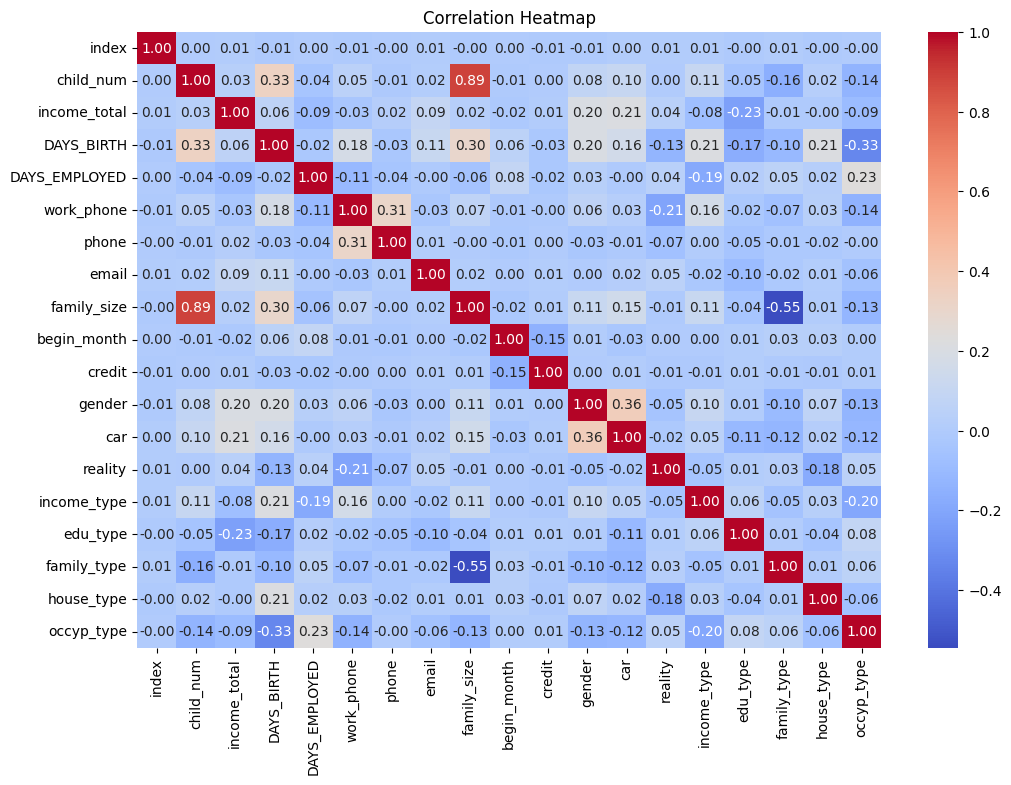

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# 데이터프레임에서 object 타입의 피쳐 선택
object_features = exp.select_dtypes(include=['object'])

# 라벨 인코더 생성 및 적용(다른 오브젝트형 변수들과도 상관관계를 보기 위해 라벨 인코딩)
label_encoder = LabelEncoder()
encoded_features = object_features.apply(label_encoder.fit_transform)

# 라벨 인코딩된 피쳐들을 기존 데이터프레임에 추가
exp_encoded = pd.concat([exp.drop(object_features.columns, axis=1), encoded_features], axis=1)

# 숫자형 열만 선택하여 상관관계 분석
numeric_columns = exp_encoded.select_dtypes(include=['float64', 'int64'])

# 상관관계 행렬 계산
correlation_matrix = numeric_columns.corr()

# 상관관계 히트맵 그리기
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True, fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


In [10]:
# "occyp_type" 열과의 상관관계를 확인하여 절대값 씌운 후 내림차순 정렬
correlation_with_occyp = correlation_matrix['occyp_type'].abs().sort_values(ascending=False)

# 상관관계가 높은 피쳐들의 순위 출력
print("Correlation with occyp_type (absolute values):")
print(correlation_with_occyp)

#근무일수 0으로 바꾸기 전엔 DAYS_EMPLOYED가 DAYS_BIRTH보다 높은 상관관계를 보였음.
#근무일수 0으로 바꾼 후에 occyp_type과 유의미한 상관관계를 가진 것으로 보이는 변수 top3은 DAYS_BIRTH, DAYS_EMPLOYED, income_type

Correlation with occyp_type (absolute values):
occyp_type       1.000000
DAYS_BIRTH       0.331310
DAYS_EMPLOYED    0.234843
income_type      0.198431
work_phone       0.143902
child_num        0.135173
gender           0.130283
family_size      0.126022
car              0.121225
income_total     0.093062
edu_type         0.084669
house_type       0.064466
email            0.061925
family_type      0.056889
reality          0.047347
credit           0.009733
begin_month      0.004292
phone            0.001171
index            0.000384
Name: occyp_type, dtype: float64


# DAYS_EMPLOYED 일반화하여 그것으로 결측치 채우기

In [34]:
exp = train.drop(columns = ['FLAG_MOBIL'])

In [35]:
exp.loc[exp['DAYS_EMPLOYED'] > 0, 'DAYS_EMPLOYED'] = 0

In [36]:
import pandas as pd

def bin_DAYS_EMPLOYED(days):
    bins = pd.cut(days, bins=50, labels=False)
    return bins

# 'DAYS_EMPLOYED' 열을 50개의 구간으로 나눈 결과를 'DAYS_EMPLOYED_cat' 열에 추가
exp['DAYS_EMPLOYED_cat'] = bin_DAYS_EMPLOYED(exp['DAYS_EMPLOYED'])
exp = exp.drop(columns=['DAYS_EMPLOYED'])

# 결과 확인
print(exp.head())

   index gender car reality  child_num  income_total           income_type  \
0      0      F   N       N          0      202500.0  Commercial associate   
1      1      F   N       Y          1      247500.0  Commercial associate   
2      2      M   Y       Y          0      450000.0               Working   
3      3      F   N       Y          0      202500.0  Commercial associate   
4      4      F   Y       Y          0      157500.0         State servant   

                        edu_type     family_type           house_type  \
0               Higher education         Married  Municipal apartment   
1  Secondary / secondary special  Civil marriage    House / apartment   
2               Higher education         Married    House / apartment   
3  Secondary / secondary special         Married    House / apartment   
4               Higher education         Married    House / apartment   

   DAYS_BIRTH  work_phone  phone  email   occyp_type  family_size  \
0      -13899          

In [38]:
# 각 'DAYS_EMPLOYED_cat'별 가장 빈도가 높은 직업(occyp_type)을 계산
most_common_occyp = exp.groupby('DAYS_EMPLOYED_cat')['occyp_type'].apply(lambda x: x.mode().iloc[0])

# 결과 출력
print(most_common_occyp)

DAYS_EMPLOYED_cat
0                Core staff
2            Medicine staff
3     High skill tech staff
4                  Laborers
5            Medicine staff
6                Core staff
7               Sales staff
8            Medicine staff
9                  Managers
10           Medicine staff
11                 Laborers
12                 Laborers
13            Cooking staff
14    Private service staff
15                 Laborers
16                 Laborers
17    High skill tech staff
18                 Laborers
19               Core staff
20               Core staff
21    High skill tech staff
22           Medicine staff
23                 Laborers
24                 Laborers
25                 Laborers
26               Core staff
27           Medicine staff
28                 Laborers
29               Core staff
30                 Laborers
31                 Laborers
32                 Laborers
33                 Laborers
34                 Laborers
35                 Laborers
36

In [39]:
# 결측치를 해당 'DAYS_EMPLOYED_cat'별 가장 빈도가 높은 직업으로 대체합니다.
for DAYS_EMPLOYED_cat, occyp in most_common_occyp.items():
    exp.loc[exp['DAYS_EMPLOYED_cat'] == DAYS_EMPLOYED_cat, 'occyp_type'] = exp.loc[exp['DAYS_EMPLOYED_cat'] == DAYS_EMPLOYED_cat, 'occyp_type'].fillna(occyp)

# 결과 출력
print(exp['occyp_type'].value_counts())

Laborers                 12530
Core staff                2715
Sales staff               2539
Managers                  2171
Drivers                   1575
High skill tech staff     1049
Medicine staff             919
Accountants                902
Cooking staff              469
Security staff             424
Cleaning staff             403
Private service staff      247
Low-skill Laborers         127
Waiters/barmen staff       124
Secretaries                 97
Realty agents               63
HR staff                    62
IT staff                    41
Name: occyp_type, dtype: int64


In [40]:
# 'occyp_type' 열의 결측치 개수 확인
missing_count = exp['occyp_type'].isnull().sum()
print("occyp_type 열의 결측치 개수:", missing_count)

occyp_type 열의 결측치 개수: 0


In [41]:
# 모든 object 열을 숫자로 변환합니다.
object_cols = exp.select_dtypes(include=['object']).columns

le = LabelEncoder()
for col in object_cols:
    exp[col] = le.fit_transform(exp[col])

# 데이터를 특성(features)과 레이블로 나눕니다.
X = exp.drop('credit', axis=1)
y = exp['credit']

# 학습 데이터와 테스트 데이터로 분할합니다.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 모델을 초기화하고 학습시킵니다.
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# 학습된 모델을 사용하여 예측을 수행합니다.
y_pred = model.predict(X_test)

# 모델의 성능을 평가합니다.
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

#Accuracy: 0.7123960695389266 달성

Accuracy: 0.7123960695389266


#DAYS_EMPLOYED 일반화 안하면 떨어짐

In [ ]:
exp11 = train.drop(columns = ['FLAG_MOBIL'])

In [ ]:
exp11.loc[exp11['DAYS_EMPLOYED'] > 0, 'DAYS_EMPLOYED'] = 0

In [ ]:
import pandas as pd

def bin_DAYS_EMPLOYED(income):
    bins = pd.cut(income, bins=50, labels=False)
    return bins

# 'DAYS_EMPLOYED' 열을 50개의 구간으로 나눈 결과를 'DAYS_EMPLOYED_cat' 열에 추가
exp11['DAYS_EMPLOYED_cat'] = bin_DAYS_EMPLOYED(exp11['DAYS_EMPLOYED'])
# exp11 = exp11.drop(columns=['DAYS_EMPLOYED']) 안없애고

In [ ]:
# 결측치를 해당 'DAYS_EMPLOYED_cat'별 가장 빈도가 높은 직업으로 대체합니다.
for DAYS_EMPLOYED_cat, occyp in most_common_occyp.items():
    exp11.loc[exp11['DAYS_EMPLOYED_cat'] == DAYS_EMPLOYED_cat, 'occyp_type'] = exp11.loc[exp11['DAYS_EMPLOYED_cat'] == DAYS_EMPLOYED_cat, 'occyp_type'].fillna(occyp)

exp11 = exp11.drop(columns=['DAYS_EMPLOYED_cat']) #이제 이건 버려

# 결과 출력
# print(exp11['occyp_type'].value_counts())

In [ ]:
# 모든 object 열을 숫자로 변환합니다.
object_cols = exp11.select_dtypes(include=['object']).columns

le = LabelEncoder()
for col in object_cols:
    exp11[col] = le.fit_transform(exp11[col])

# 데이터를 특성(features)과 레이블로 나눕니다.
X = exp11.drop('credit', axis=1)
y = exp11['credit']

# 학습 데이터와 테스트 데이터로 분할합니다.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 모델을 초기화하고 학습시킵니다.
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# 학습된 모델을 사용하여 예측을 수행합니다.
y_pred = model.predict(X_test)

# 모델의 성능을 평가합니다.
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

#원본: 0.709
#근무일수 카테고리 없애고 원래 근무일수는 남기니까 오히려 떨어짐! ==> 근무일수도 일반화가 필요했다.

Accuracy: 0.7072940287226002


# DAYS_EMPLOYED 최적의 구간 찾기

In [83]:
exp3 = train.drop(columns = ['FLAG_MOBIL'])

In [84]:
exp3.loc[exp11['DAYS_EMPLOYED'] > 0, 'DAYS_EMPLOYED'] = 0

def bin_DAYS_EMPLOYED(income):
    bins = pd.cut(income, bins=45, labels=False)
    return bins

# 'DAYS_EMPLOYED' 열을 55개의 구간으로 나눈 결과를 'DAYS_EMPLOYED_cat' 열에 추가
exp11['DAYS_EMPLOYED_cat'] = bin_DAYS_EMPLOYED(exp11['DAYS_EMPLOYED'])
exp11 = exp11.drop(columns=['DAYS_EMPLOYED'])

# 결과 확인
# print(exp11.head())

# 각 'DAYS_EMPLOYED_cat'별 가장 빈도가 높은 직업(occyp_type)을 계산
most_common_occyp = exp11.groupby('DAYS_EMPLOYED_cat')['occyp_type'].apply(lambda x: x.mode().iloc[0])

# 결과 출력
# print(most_common_occyp)

# 결측치를 해당 'DAYS_EMPLOYED_cat'별 가장 빈도가 높은 직업으로 대체합니다.
for DAYS_EMPLOYED_cat, occyp in most_common_occyp.items():
    exp11.loc[exp11['DAYS_EMPLOYED_cat'] == DAYS_EMPLOYED_cat, 'occyp_type'] = exp11.loc[exp11['DAYS_EMPLOYED_cat'] == DAYS_EMPLOYED_cat, 'occyp_type'].fillna(occyp)

# 결과 출력
# print(exp11['occyp_type'].value_counts())

In [47]:
# 모든 object 열을 숫자로 변환합니다.
object_cols = exp11.select_dtypes(include=['object']).columns

le = LabelEncoder()
for col in object_cols:
    exp11[col] = le.fit_transform(exp11[col])

# 데이터를 특성(features)과 레이블로 나눕니다.
X = exp11.drop('credit', axis=1)
y = exp11['credit']

# 학습 데이터와 테스트 데이터로 분할합니다.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 모델을 초기화하고 학습시킵니다.
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# 학습된 모델을 사용하여 예측을 수행합니다.
y_pred = model.predict(X_test)

# 모델의 성능을 평가합니다.
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

#원본: 0.709
#아직 null값 0개, Accuracy: 0.712 달성 !!!!

#53구간: 0.7082388510959939
#48구간 이하: single positional indexer is out-of-bounds 에러
#=>해당 구간의 데이터가 적은 것. 해당 구간에 해당하는 데이터가 부족하여 mode() 연산을 수행할 수 없기 때문에 오류.

Accuracy: 0.7078609221466364


결정했던 전처리대로 구간별로 다 실험 => 53~71구간까지

bins=53: Accuracy=0.70578231292517
bins=54: Accuracy=0.7088057445200302
bins=55: Accuracy=0.7063492063492064
bins=56: Accuracy=0.7072940287226002
bins=57: Accuracy=0.7080498866213152
bins=58: Error - single positional indexer is out-of-bounds. Skipping this iteration.
bins=59: Error - single positional indexer is out-of-bounds. Skipping this iteration.
bins=60: Error - single positional indexer is out-of-bounds. Skipping this iteration.
bins=61: Error - single positional indexer is out-of-bounds. Skipping this iteration.
bins=62: Error - single positional indexer is out-of-bounds. Skipping this iteration.
bins=63: Error - single positional indexer is out-of-bounds. Skipping this iteration.
bins=64: Error - single positional indexer is out-of-bounds. Skipping this iteration.
bins=65: Error - single positional indexer is out-of-bounds. Skipping this iteration.
bins=66: Error - single positional indexer is out-of-bounds. Skipping this iteration.
bins=67: Error - single positional indexer 

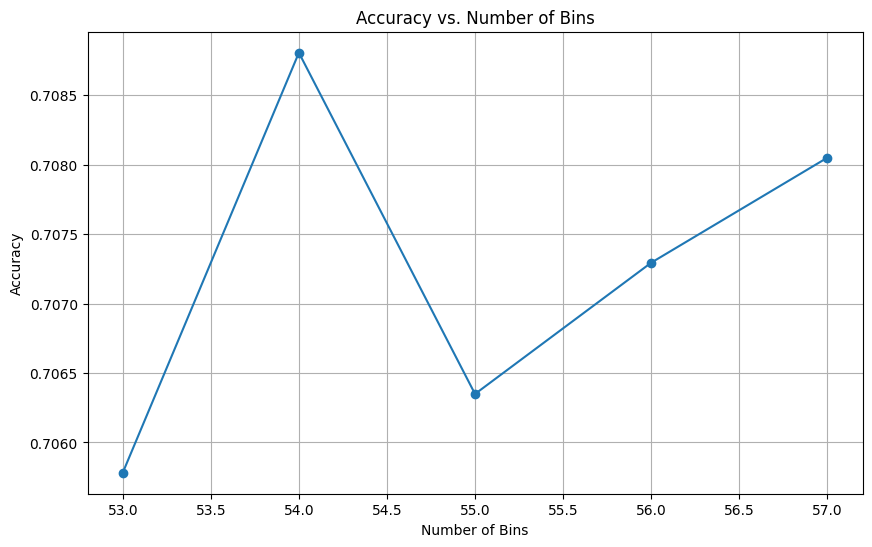

In [94]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

exp4 = train.drop(columns=['FLAG_MOBIL'])
exp4.loc[exp4['DAYS_EMPLOYED'] > 0, 'DAYS_EMPLOYED'] = 0
exp4['DAYS_EMPLOYED'] = abs(exp4['DAYS_EMPLOYED'])
exp4['begin_month'] = abs(exp4['begin_month'])
exp4.loc[exp4['child_num'] >= 3, 'child_num'] = 3

# 정확도와 bins 값을 저장할 리스트
accuracies = []
bins_values = []

for num_bins in range(53, 71):
    try:
        exp4_copy = exp4.copy()  # 기존 exp4 데이터를 복사하여 사용

        def bin_DAYS_EMPLOYED(income):
            bins = pd.cut(income, bins=num_bins, labels=False)
            return bins

        exp4_copy['DAYS_EMPLOYED_cat'] = bin_DAYS_EMPLOYED(exp4_copy['DAYS_EMPLOYED'])
        exp4_copy = exp4_copy.drop(columns=['DAYS_EMPLOYED'])

        most_common_occyp = exp4_copy.groupby('DAYS_EMPLOYED_cat')['occyp_type'].apply(lambda x: x.mode().iloc[0])

        for DAYS_EMPLOYED_cat, occyp in most_common_occyp.items():
            exp4_copy.loc[exp4_copy['DAYS_EMPLOYED_cat'] == DAYS_EMPLOYED_cat, 'occyp_type'] = exp4_copy.loc[exp4_copy['DAYS_EMPLOYED_cat'] == DAYS_EMPLOYED_cat, 'occyp_type'].fillna(occyp)

        object_cols = exp4_copy.select_dtypes(include=['object']).columns

        le = LabelEncoder()
        for col in object_cols:
            exp4_copy[col] = le.fit_transform(exp4_copy[col])

        X = exp4_copy.drop('credit', axis=1)
        y = exp4_copy['credit']

        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        model = RandomForestClassifier(random_state=42)
        model.fit(X_train, y_train)

        y_pred = model.predict(X_test)

        accuracy = accuracy_score(y_test, y_pred)
        accuracies.append(accuracy)
        bins_values.append(num_bins)
        print(f"bins={num_bins}: Accuracy={accuracy}")
    except IndexError as e:
        print(f"bins={num_bins}: Error - {e}. Skipping this iteration.")

# 정확도를 시각화합니다.
plt.figure(figsize=(10, 6))
plt.plot(bins_values, accuracies, marker='o')
plt.xlabel('Number of Bins')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Number of Bins')
plt.grid(True)
plt.show()


어디부터 인덱스에러가 나는지 체크하기 위해 범위 바꿈

bins=40: Error - single positional indexer is out-of-bounds. Skipping this iteration.
bins=41: Error - single positional indexer is out-of-bounds. Skipping this iteration.
bins=42: Error - single positional indexer is out-of-bounds. Skipping this iteration.
bins=43: Error - single positional indexer is out-of-bounds. Skipping this iteration.
bins=44: Error - single positional indexer is out-of-bounds. Skipping this iteration.
bins=45: Error - single positional indexer is out-of-bounds. Skipping this iteration.
bins=46: Error - single positional indexer is out-of-bounds. Skipping this iteration.
bins=47: Error - single positional indexer is out-of-bounds. Skipping this iteration.
bins=48: Error - single positional indexer is out-of-bounds. Skipping this iteration.
bins=49: Error - single positional indexer is out-of-bounds. Skipping this iteration.
bins=50: Accuracy=0.7069160997732427
bins=51: Accuracy=0.7082388510959939
bins=52: Accuracy=0.70578231292517
bins=53: Accuracy=0.70578231292

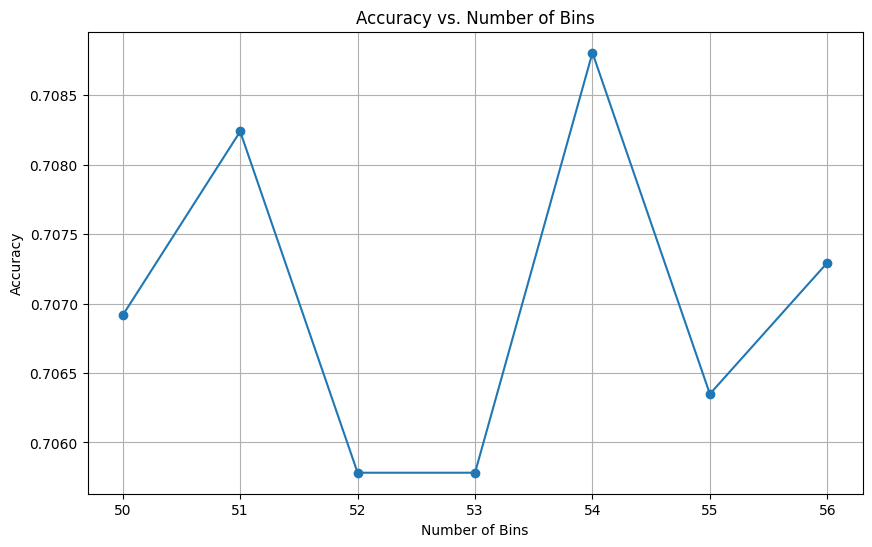

In [95]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

exp4 = train.drop(columns=['FLAG_MOBIL'])
exp4.loc[exp4['DAYS_EMPLOYED'] > 0, 'DAYS_EMPLOYED'] = 0
exp4['DAYS_EMPLOYED'] = abs(exp4['DAYS_EMPLOYED'])
exp4['begin_month'] = abs(exp4['begin_month'])
exp4.loc[exp4['child_num'] >= 3, 'child_num'] = 3

# 정확도와 bins 값을 저장할 리스트
accuracies = []
bins_values = []

for num_bins in range(40, 57):
    try:
        exp4_copy = exp4.copy()  # 기존 exp4 데이터를 복사하여 사용

        def bin_DAYS_EMPLOYED(income):
            bins = pd.cut(income, bins=num_bins, labels=False)
            return bins

        exp4_copy['DAYS_EMPLOYED_cat'] = bin_DAYS_EMPLOYED(exp4_copy['DAYS_EMPLOYED'])
        exp4_copy = exp4_copy.drop(columns=['DAYS_EMPLOYED'])

        most_common_occyp = exp4_copy.groupby('DAYS_EMPLOYED_cat')['occyp_type'].apply(lambda x: x.mode().iloc[0])

        for DAYS_EMPLOYED_cat, occyp in most_common_occyp.items():
            exp4_copy.loc[exp4_copy['DAYS_EMPLOYED_cat'] == DAYS_EMPLOYED_cat, 'occyp_type'] = exp4_copy.loc[exp4_copy['DAYS_EMPLOYED_cat'] == DAYS_EMPLOYED_cat, 'occyp_type'].fillna(occyp)

        object_cols = exp4_copy.select_dtypes(include=['object']).columns

        le = LabelEncoder()
        for col in object_cols:
            exp4_copy[col] = le.fit_transform(exp4_copy[col])

        X = exp4_copy.drop('credit', axis=1)
        y = exp4_copy['credit']

        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        model = RandomForestClassifier(random_state=42)
        model.fit(X_train, y_train)

        y_pred = model.predict(X_test)

        accuracy = accuracy_score(y_test, y_pred)
        accuracies.append(accuracy)
        bins_values.append(num_bins)
        print(f"bins={num_bins}: Accuracy={accuracy}")
    except IndexError as e:
        print(f"bins={num_bins}: Error - {e}. Skipping this iteration.")

# 정확도를 시각화합니다.
plt.figure(figsize=(10, 6))
plt.plot(bins_values, accuracies, marker='o')
plt.xlabel('Number of Bins')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Number of Bins')
plt.grid(True)
plt.show()


성능을 방해하는 놈이 누구인가... DAYS_EMPLOYED 절대값인가?

bins=40: Error - single positional indexer is out-of-bounds. Skipping this iteration.
bins=41: Error - single positional indexer is out-of-bounds. Skipping this iteration.
bins=42: Error - single positional indexer is out-of-bounds. Skipping this iteration.
bins=43: Error - single positional indexer is out-of-bounds. Skipping this iteration.
bins=44: Error - single positional indexer is out-of-bounds. Skipping this iteration.
bins=45: Error - single positional indexer is out-of-bounds. Skipping this iteration.
bins=46: Error - single positional indexer is out-of-bounds. Skipping this iteration.
bins=47: Error - single positional indexer is out-of-bounds. Skipping this iteration.
bins=48: Error - single positional indexer is out-of-bounds. Skipping this iteration.
bins=49: Error - single positional indexer is out-of-bounds. Skipping this iteration.
bins=50: Accuracy=0.705026455026455
bins=51: Accuracy=0.7072940287226002
bins=52: Accuracy=0.7048374905517762
bins=53: Accuracy=0.7080498866

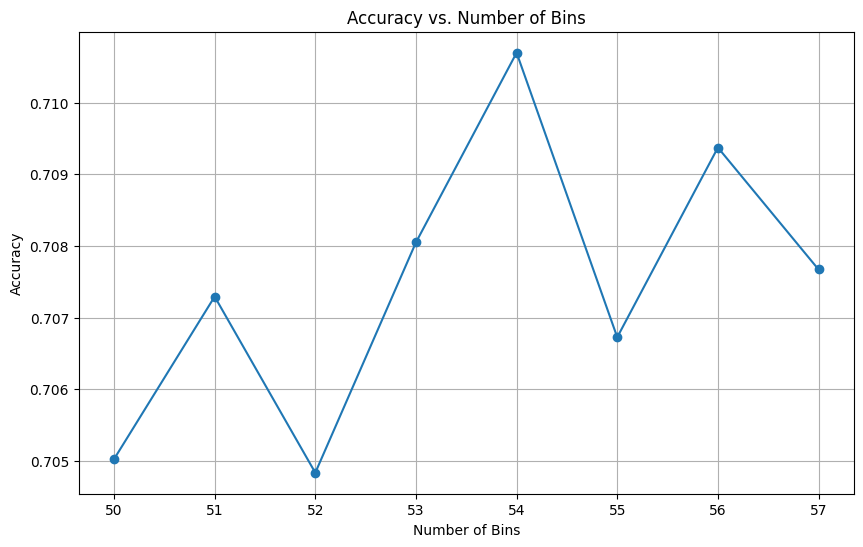

In [96]:
exp4 = train.drop(columns=['FLAG_MOBIL'])
exp4.loc[exp4['DAYS_EMPLOYED'] > 0, 'DAYS_EMPLOYED'] = 0
# exp4['DAYS_EMPLOYED'] = abs(exp4['DAYS_EMPLOYED'])
exp4['begin_month'] = abs(exp4['begin_month'])
exp4.loc[exp4['child_num'] >= 3, 'child_num'] = 3

# 정확도와 bins 값을 저장할 리스트
accuracies = []
bins_values = []

for num_bins in range(40, 70):
    try:
        exp4_copy = exp4.copy()  # 기존 exp4 데이터를 복사하여 사용

        def bin_DAYS_EMPLOYED(income):
            bins = pd.cut(income, bins=num_bins, labels=False)
            return bins

        exp4_copy['DAYS_EMPLOYED_cat'] = bin_DAYS_EMPLOYED(exp4_copy['DAYS_EMPLOYED'])
        exp4_copy = exp4_copy.drop(columns=['DAYS_EMPLOYED'])

        most_common_occyp = exp4_copy.groupby('DAYS_EMPLOYED_cat')['occyp_type'].apply(lambda x: x.mode().iloc[0])

        for DAYS_EMPLOYED_cat, occyp in most_common_occyp.items():
            exp4_copy.loc[exp4_copy['DAYS_EMPLOYED_cat'] == DAYS_EMPLOYED_cat, 'occyp_type'] = exp4_copy.loc[exp4_copy['DAYS_EMPLOYED_cat'] == DAYS_EMPLOYED_cat, 'occyp_type'].fillna(occyp)

        object_cols = exp4_copy.select_dtypes(include=['object']).columns

        le = LabelEncoder()
        for col in object_cols:
            exp4_copy[col] = le.fit_transform(exp4_copy[col])

        X = exp4_copy.drop('credit', axis=1)
        y = exp4_copy['credit']

        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        model = RandomForestClassifier(random_state=42)
        model.fit(X_train, y_train)

        y_pred = model.predict(X_test)

        accuracy = accuracy_score(y_test, y_pred)
        accuracies.append(accuracy)
        bins_values.append(num_bins)
        print(f"bins={num_bins}: Accuracy={accuracy}")
    except IndexError as e:
        print(f"bins={num_bins}: Error - {e}. Skipping this iteration.")

# 정확도를 시각화합니다.
plt.figure(figsize=(10, 6))
plt.plot(bins_values, accuracies, marker='o')
plt.xlabel('Number of Bins')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Number of Bins')
plt.grid(True)
plt.show()

#0.710까진 나옴

begin_month도?

bins=40: Error - single positional indexer is out-of-bounds. Skipping this iteration.
bins=41: Error - single positional indexer is out-of-bounds. Skipping this iteration.
bins=42: Error - single positional indexer is out-of-bounds. Skipping this iteration.
bins=43: Error - single positional indexer is out-of-bounds. Skipping this iteration.
bins=44: Error - single positional indexer is out-of-bounds. Skipping this iteration.
bins=45: Error - single positional indexer is out-of-bounds. Skipping this iteration.
bins=46: Error - single positional indexer is out-of-bounds. Skipping this iteration.
bins=47: Error - single positional indexer is out-of-bounds. Skipping this iteration.
bins=48: Error - single positional indexer is out-of-bounds. Skipping this iteration.
bins=49: Error - single positional indexer is out-of-bounds. Skipping this iteration.
bins=50: Accuracy=0.7078609221466364
bins=51: Accuracy=0.7065381708238851
bins=52: Accuracy=0.7091836734693877
bins=53: Accuracy=0.708427815

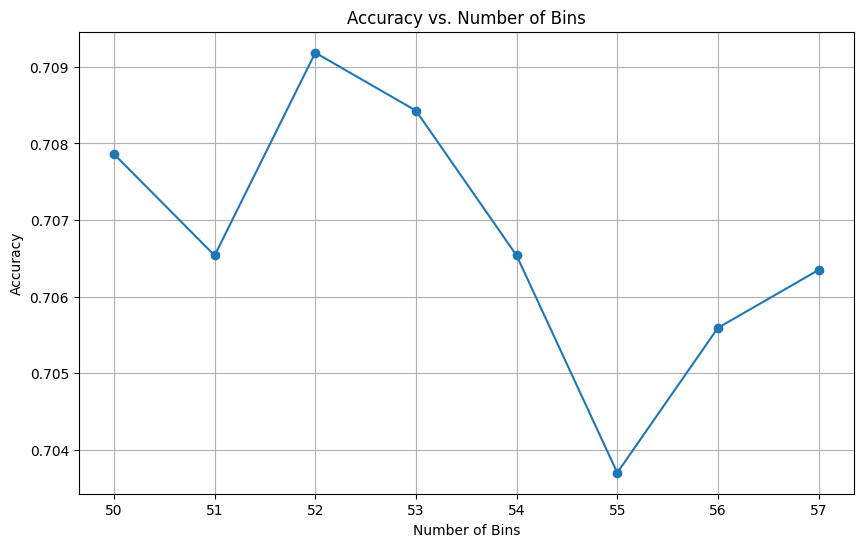

In [97]:
exp4 = train.drop(columns=['FLAG_MOBIL'])
exp4.loc[exp4['DAYS_EMPLOYED'] > 0, 'DAYS_EMPLOYED'] = 0
# exp4['DAYS_EMPLOYED'] = abs(exp4['DAYS_EMPLOYED'])
# exp4['begin_month'] = abs(exp4['begin_month'])
exp4.loc[exp4['child_num'] >= 3, 'child_num'] = 3

# 정확도와 bins 값을 저장할 리스트
accuracies = []
bins_values = []

for num_bins in range(40, 70):
    try:
        exp4_copy = exp4.copy()  # 기존 exp4 데이터를 복사하여 사용

        def bin_DAYS_EMPLOYED(income):
            bins = pd.cut(income, bins=num_bins, labels=False)
            return bins

        exp4_copy['DAYS_EMPLOYED_cat'] = bin_DAYS_EMPLOYED(exp4_copy['DAYS_EMPLOYED'])
        exp4_copy = exp4_copy.drop(columns=['DAYS_EMPLOYED'])

        most_common_occyp = exp4_copy.groupby('DAYS_EMPLOYED_cat')['occyp_type'].apply(lambda x: x.mode().iloc[0])

        for DAYS_EMPLOYED_cat, occyp in most_common_occyp.items():
            exp4_copy.loc[exp4_copy['DAYS_EMPLOYED_cat'] == DAYS_EMPLOYED_cat, 'occyp_type'] = exp4_copy.loc[exp4_copy['DAYS_EMPLOYED_cat'] == DAYS_EMPLOYED_cat, 'occyp_type'].fillna(occyp)

        object_cols = exp4_copy.select_dtypes(include=['object']).columns

        le = LabelEncoder()
        for col in object_cols:
            exp4_copy[col] = le.fit_transform(exp4_copy[col])

        X = exp4_copy.drop('credit', axis=1)
        y = exp4_copy['credit']

        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        model = RandomForestClassifier(random_state=42)
        model.fit(X_train, y_train)

        y_pred = model.predict(X_test)

        accuracy = accuracy_score(y_test, y_pred)
        accuracies.append(accuracy)
        bins_values.append(num_bins)
        print(f"bins={num_bins}: Accuracy={accuracy}")
    except IndexError as e:
        print(f"bins={num_bins}: Error - {e}. Skipping this iteration.")

# 정확도를 시각화합니다.
plt.figure(figsize=(10, 6))
plt.plot(bins_values, accuracies, marker='o')
plt.xlabel('Number of Bins')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Number of Bins')
plt.grid(True)
plt.show()

#최고: 52구간 0.709
#아닌가봄

child_num도 빼보자

bins=40: Error - single positional indexer is out-of-bounds. Skipping this iteration.
bins=41: Error - single positional indexer is out-of-bounds. Skipping this iteration.
bins=42: Error - single positional indexer is out-of-bounds. Skipping this iteration.
bins=43: Error - single positional indexer is out-of-bounds. Skipping this iteration.
bins=44: Error - single positional indexer is out-of-bounds. Skipping this iteration.
bins=45: Error - single positional indexer is out-of-bounds. Skipping this iteration.
bins=46: Error - single positional indexer is out-of-bounds. Skipping this iteration.
bins=47: Error - single positional indexer is out-of-bounds. Skipping this iteration.
bins=48: Error - single positional indexer is out-of-bounds. Skipping this iteration.
bins=49: Error - single positional indexer is out-of-bounds. Skipping this iteration.
bins=50: Accuracy=0.7123960695389266
bins=51: Accuracy=0.7055933484504913
bins=52: Accuracy=0.7069160997732427
bins=53: Accuracy=0.708238851

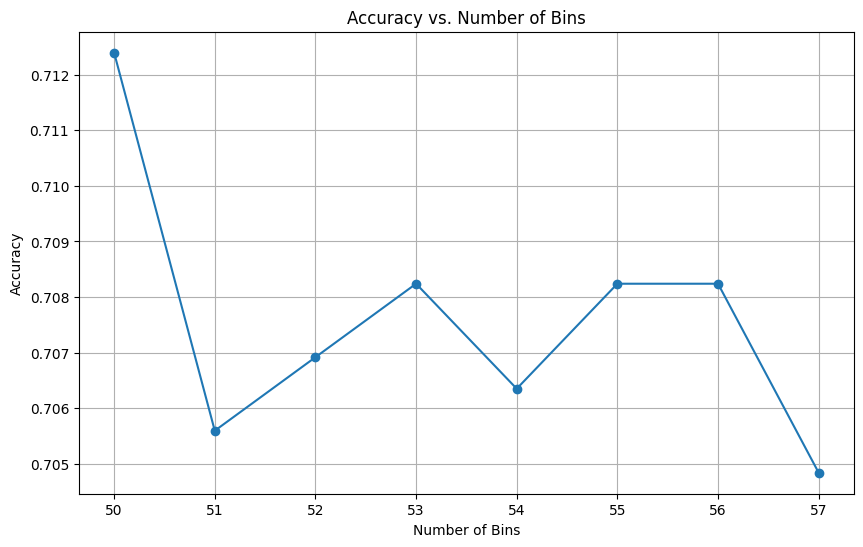

In [98]:
exp4 = train.drop(columns=['FLAG_MOBIL'])
exp4.loc[exp4['DAYS_EMPLOYED'] > 0, 'DAYS_EMPLOYED'] = 0
# exp4['DAYS_EMPLOYED'] = abs(exp4['DAYS_EMPLOYED'])
# exp4['begin_month'] = abs(exp4['begin_month'])
# exp4.loc[exp4['child_num'] >= 3, 'child_num'] = 3

# 정확도와 bins 값을 저장할 리스트
accuracies = []
bins_values = []

for num_bins in range(40, 70):
    try:
        exp4_copy = exp4.copy()  # 기존 exp4 데이터를 복사하여 사용

        def bin_DAYS_EMPLOYED(income):
            bins = pd.cut(income, bins=num_bins, labels=False)
            return bins

        exp4_copy['DAYS_EMPLOYED_cat'] = bin_DAYS_EMPLOYED(exp4_copy['DAYS_EMPLOYED'])
        exp4_copy = exp4_copy.drop(columns=['DAYS_EMPLOYED'])

        most_common_occyp = exp4_copy.groupby('DAYS_EMPLOYED_cat')['occyp_type'].apply(lambda x: x.mode().iloc[0])

        for DAYS_EMPLOYED_cat, occyp in most_common_occyp.items():
            exp4_copy.loc[exp4_copy['DAYS_EMPLOYED_cat'] == DAYS_EMPLOYED_cat, 'occyp_type'] = exp4_copy.loc[exp4_copy['DAYS_EMPLOYED_cat'] == DAYS_EMPLOYED_cat, 'occyp_type'].fillna(occyp)

        object_cols = exp4_copy.select_dtypes(include=['object']).columns

        le = LabelEncoder()
        for col in object_cols:
            exp4_copy[col] = le.fit_transform(exp4_copy[col])

        X = exp4_copy.drop('credit', axis=1)
        y = exp4_copy['credit']

        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        model = RandomForestClassifier(random_state=42)
        model.fit(X_train, y_train)

        y_pred = model.predict(X_test)

        accuracy = accuracy_score(y_test, y_pred)
        accuracies.append(accuracy)
        bins_values.append(num_bins)
        print(f"bins={num_bins}: Accuracy={accuracy}")
    except IndexError as e:
        print(f"bins={num_bins}: Error - {e}. Skipping this iteration.")

# 정확도를 시각화합니다.
plt.figure(figsize=(10, 6))
plt.plot(bins_values, accuracies, marker='o')
plt.xlabel('Number of Bins')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Number of Bins')
plt.grid(True)
plt.show()

#이전처럼 bins=50: Accuracy=0.7123

bins=50: Accuracy=0.7067271352985639
bins=51: Accuracy=0.7067271352985639
bins=52: Accuracy=0.7067271352985639
bins=53: Accuracy=0.7093726379440665
bins=54: Accuracy=0.7071050642479214
bins=55: Accuracy=0.7086167800453514
bins=56: Accuracy=0.7059712773998488
bins=57: Accuracy=0.7065381708238851


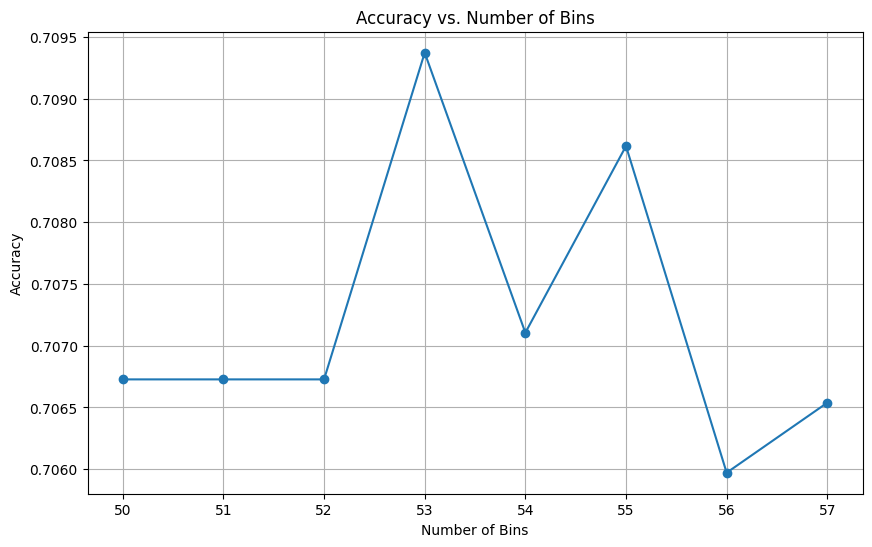

In [99]:
exp4 = train.drop(columns=['FLAG_MOBIL'])
exp4.loc[exp4['DAYS_EMPLOYED'] > 0, 'DAYS_EMPLOYED'] = 0
# exp4['DAYS_EMPLOYED'] = abs(exp4['DAYS_EMPLOYED'])
exp4['begin_month'] = abs(exp4['begin_month'])
# exp4.loc[exp4['child_num'] >= 3, 'child_num'] = 3

# 정확도와 bins 값을 저장할 리스트
accuracies = []
bins_values = []

for num_bins in range(40, 70):
    try:
        exp4_copy = exp4.copy()  # 기존 exp4 데이터를 복사하여 사용

        def bin_DAYS_EMPLOYED(income):
            bins = pd.cut(income, bins=num_bins, labels=False)
            return bins

        exp4_copy['DAYS_EMPLOYED_cat'] = bin_DAYS_EMPLOYED(exp4_copy['DAYS_EMPLOYED'])
        exp4_copy = exp4_copy.drop(columns=['DAYS_EMPLOYED'])

        most_common_occyp = exp4_copy.groupby('DAYS_EMPLOYED_cat')['occyp_type'].apply(lambda x: x.mode().iloc[0])

        for DAYS_EMPLOYED_cat, occyp in most_common_occyp.items():
            exp4_copy.loc[exp4_copy['DAYS_EMPLOYED_cat'] == DAYS_EMPLOYED_cat, 'occyp_type'] = exp4_copy.loc[exp4_copy['DAYS_EMPLOYED_cat'] == DAYS_EMPLOYED_cat, 'occyp_type'].fillna(occyp)

        object_cols = exp4_copy.select_dtypes(include=['object']).columns

        le = LabelEncoder()
        for col in object_cols:
            exp4_copy[col] = le.fit_transform(exp4_copy[col])

        X = exp4_copy.drop('credit', axis=1)
        y = exp4_copy['credit']

        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        model = RandomForestClassifier(random_state=42)
        model.fit(X_train, y_train)

        y_pred = model.predict(X_test)

        accuracy = accuracy_score(y_test, y_pred)
        accuracies.append(accuracy)
        bins_values.append(num_bins)
        print(f"bins={num_bins}: Accuracy={accuracy}")
    except IndexError as e:
        # print(f"bins={num_bins}: Error - {e}")
        pass

# 정확도를 시각화합니다.
plt.figure(figsize=(10, 6))
plt.plot(bins_values, accuracies, marker='o')
plt.xlabel('Number of Bins')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Number of Bins')
plt.grid(True)
plt.show()

#begin_month만 빼줌 bins=53: Accuracy=0.7093
#별로
"""
exp4.loc[exp4['DAYS_EMPLOYED'] > 0, 'DAYS_EMPLOYED'] = 0
# exp4['DAYS_EMPLOYED'] = abs(exp4['DAYS_EMPLOYED'])
# exp4['begin_month'] = abs(exp4['begin_month'])
# exp4.loc[exp4['child_num'] >= 3, 'child_num'] = 3
전처리는 이 경우가 제일 점수 높았음
"""

# begin month로 결측치 채우기

In [75]:
exp11 = train.drop(columns = ['FLAG_MOBIL'])

In [76]:
import pandas as pd

def bin_begin_month(income):
    bins = pd.cut(income, bins=70, labels=False)
    return bins

# 'begin_month' 열을 70개의 구간으로 나눈 결과를 'begin_month_cat' 열에 추가
exp11['begin_month_cat'] = bin_begin_month(exp11['begin_month'])
exp11 = exp11.drop(columns=['begin_month'])

# 결과 확인
# print(exp11.head())

In [77]:
# 각 'begin_month_cat'별 가장 빈도가 높은 직업(occyp_type)을 계산
most_common_occyp = exp11.groupby('begin_month_cat')['occyp_type'].apply(lambda x: x.mode().iloc[0])

# 결과 출력
# print(most_common_occyp)

In [78]:
# 결측치를 해당 'begin_month_cat'별 가장 빈도가 높은 직업으로 대체합니다.
for begin_month_cat, occyp in most_common_occyp.items():
    exp11.loc[exp11['begin_month_cat'] == begin_month_cat, 'occyp_type'] = exp11.loc[exp11['begin_month_cat'] == begin_month_cat, 'occyp_type'].fillna(occyp)

# 결과 출력
# print(exp11['occyp_type'].value_counts())

In [79]:
# 모든 object 열을 숫자로 변환합니다.
object_cols = exp11.select_dtypes(include=['object']).columns

le = LabelEncoder()
for col in object_cols:
    exp11[col] = le.fit_transform(exp11[col])

# 데이터를 특성(features)과 레이블로 나눕니다.
X = exp11.drop('credit', axis=1)
y = exp11['credit']

# 학습 데이터와 테스트 데이터로 분할합니다.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 모델을 초기화하고 학습시킵니다.
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# 학습된 모델을 사용하여 예측을 수행합니다.
y_pred = model.predict(X_test)

# 모델의 성능을 평가합니다.
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

#원본: 0.709
#45구간: 0.705026455026455
#55구간: 0.7106953892668179
#70구간: 0.7086167800453514


Accuracy: 0.7086167800453514


# begin_month 최적의 구간 찾기

bins=46: Accuracy=0.7065381708238851
bins=47: Accuracy=0.7069160997732427
bins=48: Accuracy=0.7044595616024187
bins=49: Accuracy=0.7076719576719577
bins=50: Accuracy=0.7067271352985639
bins=51: Accuracy=0.7048374905517762
bins=52: Accuracy=0.7093726379440665
bins=53: Accuracy=0.7067271352985639
bins=54: Accuracy=0.7048374905517762
bins=55: Accuracy=0.7106953892668179
bins=56: Accuracy=0.7061602418745276
bins=57: Accuracy=0.7052154195011338
bins=58: Accuracy=0.7052154195011338
bins=59: Accuracy=0.7072940287226002
bins=60: Accuracy=0.7054043839758125
bins=61: Accuracy=0.7086167800453514
bins=62: Accuracy=0.7086167800453514
bins=63: Accuracy=0.7084278155706727
bins=64: Accuracy=0.7093726379440665
bins=65: Accuracy=0.7084278155706727
bins=66: Accuracy=0.7086167800453514
bins=67: Accuracy=0.7086167800453514
bins=68: Accuracy=0.7088057445200302
bins=69: Accuracy=0.7088057445200302


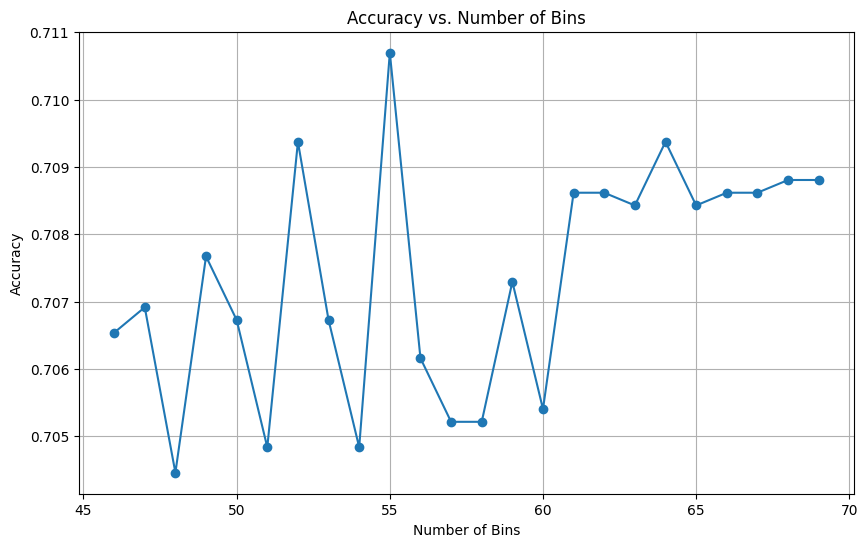

In [82]:
accuracies = []  # 정확도를 저장할 리스트

for num_bins in range(46, 70):
    exp11 = train.drop(columns=['FLAG_MOBIL'])

    def bin_begin_month(income):
        bins = pd.cut(income, bins=num_bins, labels=False)
        return bins

    exp11['begin_month_cat'] = bin_begin_month(exp11['begin_month'])
    exp11 = exp11.drop(columns=['begin_month'])

    most_common_occyp = exp11.groupby('begin_month_cat')['occyp_type'].apply(lambda x: x.mode().iloc[0])

    for begin_month_cat, occyp in most_common_occyp.items():
        exp11.loc[exp11['begin_month_cat'] == begin_month_cat, 'occyp_type'] = exp11.loc[exp11['begin_month_cat'] == begin_month_cat, 'occyp_type'].fillna(occyp)

    object_cols = exp11.select_dtypes(include=['object']).columns

    le = LabelEncoder()
    for col in object_cols:
        exp11[col] = le.fit_transform(exp11[col])

    X = exp11.drop('credit', axis=1)
    y = exp11['credit']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    model = RandomForestClassifier(random_state=42)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)  # 정확도를 리스트에 추가
    print(f"bins={num_bins}: Accuracy={accuracy}")

# 정확도를 시각화합니다.
plt.figure(figsize=(10, 6))
plt.plot(range(46, 70), accuracies, marker='o')
plt.xlabel('Number of Bins')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Number of Bins')
plt.grid(True)
plt.show()

# 최적: bins=55: Accuracy=0.7106953892668179


결정된 전처리로 다시 실험

bins=40: Accuracy=0.7021919879062736
bins=41: Accuracy=0.7018140589569161
bins=42: Accuracy=0.7037037037037037
bins=43: Accuracy=0.7046485260770975
bins=44: Accuracy=0.7031368102796675
bins=45: Accuracy=0.7061602418745276
bins=46: Accuracy=0.7118291761148904
bins=47: Accuracy=0.7061602418745276
bins=48: Accuracy=0.7054043839758125
bins=49: Accuracy=0.7088057445200302
bins=50: Accuracy=0.708994708994709
bins=51: Accuracy=0.7086167800453514
bins=52: Accuracy=0.7074829931972789
bins=53: Accuracy=0.7078609221466364
bins=54: Accuracy=0.7084278155706727
bins=55: Accuracy=0.7071050642479214
bins=56: Accuracy=0.7088057445200302
bins=57: Accuracy=0.7063492063492064
bins=58: Accuracy=0.7076719576719577
bins=59: Accuracy=0.7078609221466364
bins=60: Accuracy=0.7072940287226002
bins=61: Accuracy=0.7059712773998488
bins=62: Accuracy=0.7063492063492064
bins=63: Accuracy=0.70578231292517
bins=64: Accuracy=0.7061602418745276
bins=65: Accuracy=0.70578231292517
bins=66: Accuracy=0.7061602418745276
bins=6

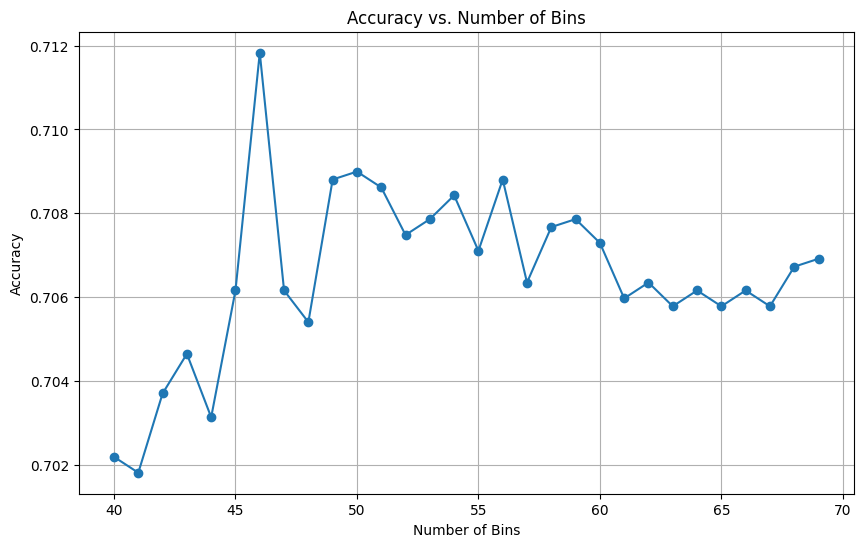

In [100]:
exp6 = train.drop(columns=['FLAG_MOBIL'])
exp6.loc[exp6['DAYS_EMPLOYED'] > 0, 'DAYS_EMPLOYED'] = 0
exp6['DAYS_EMPLOYED'] = abs(exp6['DAYS_EMPLOYED'])
exp6['begin_month'] = abs(exp6['begin_month'])
exp6.loc[exp6['child_num'] >= 3, 'child_num'] = 3

# 정확도와 bins 값을 저장할 리스트
accuracies = []
bins_values = []

for num_bins in range(40, 70):
    try:
        exp6_copy = exp6.copy()  # 기존 exp6 데이터를 복사하여 사용

        def bin_begin_month(income):
            bins = pd.cut(income, bins=num_bins, labels=False)
            return bins

        exp6_copy['begin_month_cat'] = bin_begin_month(exp6_copy['begin_month'])
        exp6_copy = exp6_copy.drop(columns=['begin_month'])

        most_common_occyp = exp6_copy.groupby('begin_month_cat')['occyp_type'].apply(lambda x: x.mode().iloc[0])

        for begin_month_cat, occyp in most_common_occyp.items():
            exp6_copy.loc[exp6_copy['begin_month_cat'] == begin_month_cat, 'occyp_type'] = exp6_copy.loc[exp6_copy['begin_month_cat'] == begin_month_cat, 'occyp_type'].fillna(occyp)

        object_cols = exp6_copy.select_dtypes(include=['object']).columns

        le = LabelEncoder()
        for col in object_cols:
            exp6_copy[col] = le.fit_transform(exp6_copy[col])

        X = exp6_copy.drop('credit', axis=1)
        y = exp6_copy['credit']

        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        model = RandomForestClassifier(random_state=42)
        model.fit(X_train, y_train)

        y_pred = model.predict(X_test)

        accuracy = accuracy_score(y_test, y_pred)
        accuracies.append(accuracy)
        bins_values.append(num_bins)
        print(f"bins={num_bins}: Accuracy={accuracy}")
    except IndexError as e:
        print(f"bins={num_bins}: Error - {e}")

# 정확도를 시각화합니다.
plt.figure(figsize=(10, 6))
plt.plot(bins_values, accuracies, marker='o')
plt.xlabel('Number of Bins')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Number of Bins')
plt.grid(True)
plt.show()

#bins=46: Accuracy=0.7118291761148904
#원래의 최적인 55에서 46으로 많이 이동. 0.712는 나오지 못했다.

child_num을 빼보자

bins=40: Accuracy=0.7069160997732427
bins=41: Accuracy=0.7038926681783825
bins=42: Accuracy=0.705026455026455
bins=43: Accuracy=0.7025699168556312
bins=44: Accuracy=0.7038926681783825
bins=45: Accuracy=0.7052154195011338
bins=46: Accuracy=0.7099395313681028
bins=47: Accuracy=0.7038926681783825
bins=48: Accuracy=0.7061602418745276
bins=49: Accuracy=0.7069160997732427
bins=50: Accuracy=0.7074829931972789
bins=51: Accuracy=0.7088057445200302
bins=52: Accuracy=0.7071050642479214
bins=53: Accuracy=0.7088057445200302
bins=54: Accuracy=0.7093726379440665
bins=55: Accuracy=0.7086167800453514
bins=56: Accuracy=0.7080498866213152
bins=57: Accuracy=0.7105064247921391
bins=58: Accuracy=0.7067271352985639
bins=59: Accuracy=0.7101284958427816
bins=60: Accuracy=0.7105064247921391
bins=61: Accuracy=0.7059712773998488
bins=62: Accuracy=0.7061602418745276
bins=63: Accuracy=0.7061602418745276
bins=64: Accuracy=0.7059712773998488
bins=65: Accuracy=0.7054043839758125


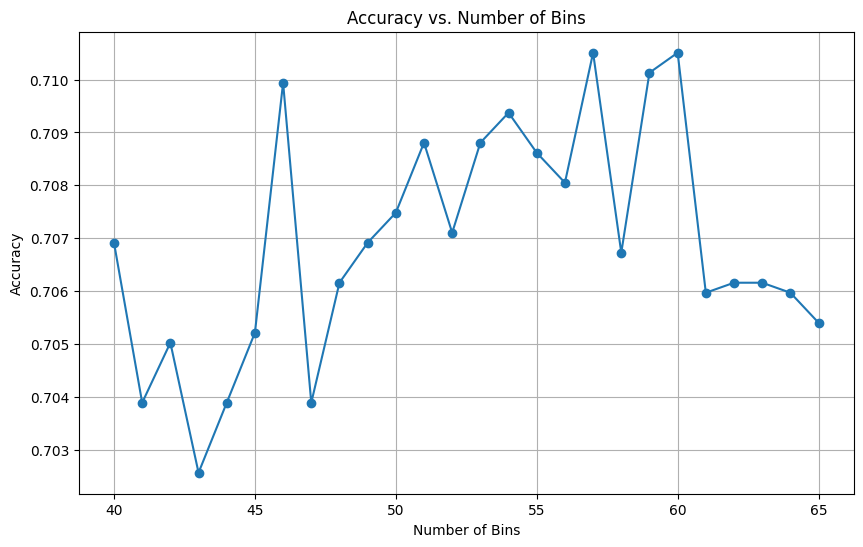

In [101]:
exp6 = train.drop(columns=['FLAG_MOBIL'])
exp6.loc[exp6['DAYS_EMPLOYED'] > 0, 'DAYS_EMPLOYED'] = 0
exp6['DAYS_EMPLOYED'] = abs(exp6['DAYS_EMPLOYED'])
exp6['begin_month'] = abs(exp6['begin_month'])
# exp6.loc[exp6['child_num'] >= 3, 'child_num'] = 3

# 정확도와 bins 값을 저장할 리스트
accuracies = []
bins_values = []

for num_bins in range(40, 66):
    try:
        exp6_copy = exp6.copy()  # 기존 exp6 데이터를 복사하여 사용

        def bin_begin_month(income):
            bins = pd.cut(income, bins=num_bins, labels=False)
            return bins

        exp6_copy['begin_month_cat'] = bin_begin_month(exp6_copy['begin_month'])
        exp6_copy = exp6_copy.drop(columns=['begin_month'])

        most_common_occyp = exp6_copy.groupby('begin_month_cat')['occyp_type'].apply(lambda x: x.mode().iloc[0])

        for begin_month_cat, occyp in most_common_occyp.items():
            exp6_copy.loc[exp6_copy['begin_month_cat'] == begin_month_cat, 'occyp_type'] = exp6_copy.loc[exp6_copy['begin_month_cat'] == begin_month_cat, 'occyp_type'].fillna(occyp)

        object_cols = exp6_copy.select_dtypes(include=['object']).columns

        le = LabelEncoder()
        for col in object_cols:
            exp6_copy[col] = le.fit_transform(exp6_copy[col])

        X = exp6_copy.drop('credit', axis=1)
        y = exp6_copy['credit']

        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        model = RandomForestClassifier(random_state=42)
        model.fit(X_train, y_train)

        y_pred = model.predict(X_test)

        accuracy = accuracy_score(y_test, y_pred)
        accuracies.append(accuracy)
        bins_values.append(num_bins)
        print(f"bins={num_bins}: Accuracy={accuracy}")
    except IndexError as e:
        print(f"bins={num_bins}: Error - {e}")

# 정확도를 시각화합니다.
plt.figure(figsize=(10, 6))
plt.plot(bins_values, accuracies, marker='o')
plt.xlabel('Number of Bins')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Number of Bins')
plt.grid(True)
plt.show()

#이전처럼 bins=50: Accuracy=0.7123

begin_month 절대값도 빼보자

bins=40: Accuracy=0.7059712773998488
bins=41: Accuracy=0.7029478458049887
bins=42: Accuracy=0.705026455026455
bins=43: Accuracy=0.7067271352985639
bins=44: Accuracy=0.7067271352985639
bins=45: Accuracy=0.703514739229025
bins=46: Accuracy=0.7078609221466364
bins=47: Accuracy=0.7054043839758125
bins=48: Accuracy=0.70578231292517
bins=49: Accuracy=0.7072940287226002
bins=50: Accuracy=0.7063492063492064
bins=51: Accuracy=0.705026455026455
bins=52: Accuracy=0.7048374905517762
bins=53: Accuracy=0.7084278155706727
bins=54: Accuracy=0.7072940287226002
bins=55: Accuracy=0.7088057445200302
bins=56: Accuracy=0.7048374905517762
bins=57: Accuracy=0.705026455026455
bins=58: Accuracy=0.7059712773998488
bins=59: Accuracy=0.7061602418745276
bins=60: Accuracy=0.7055933484504913
bins=61: Accuracy=0.7080498866213152
bins=62: Accuracy=0.7082388510959939
bins=63: Accuracy=0.7082388510959939
bins=64: Accuracy=0.7084278155706727
bins=65: Accuracy=0.7084278155706727


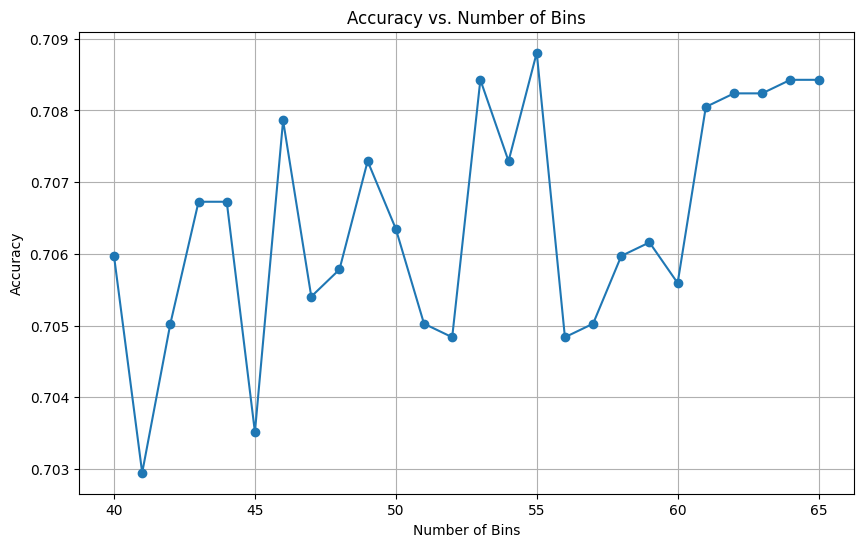

In [102]:
exp6 = train.drop(columns=['FLAG_MOBIL'])
exp6.loc[exp6['DAYS_EMPLOYED'] > 0, 'DAYS_EMPLOYED'] = 0
exp6['DAYS_EMPLOYED'] = abs(exp6['DAYS_EMPLOYED'])
# exp6['begin_month'] = abs(exp6['begin_month'])
# exp6.loc[exp6['child_num'] >= 3, 'child_num'] = 3

# 정확도와 bins 값을 저장할 리스트
accuracies = []
bins_values = []

for num_bins in range(40, 66):
    try:
        exp6_copy = exp6.copy()  # 기존 exp6 데이터를 복사하여 사용

        def bin_begin_month(income):
            bins = pd.cut(income, bins=num_bins, labels=False)
            return bins

        exp6_copy['begin_month_cat'] = bin_begin_month(exp6_copy['begin_month'])
        exp6_copy = exp6_copy.drop(columns=['begin_month'])

        most_common_occyp = exp6_copy.groupby('begin_month_cat')['occyp_type'].apply(lambda x: x.mode().iloc[0])

        for begin_month_cat, occyp in most_common_occyp.items():
            exp6_copy.loc[exp6_copy['begin_month_cat'] == begin_month_cat, 'occyp_type'] = exp6_copy.loc[exp6_copy['begin_month_cat'] == begin_month_cat, 'occyp_type'].fillna(occyp)

        object_cols = exp6_copy.select_dtypes(include=['object']).columns

        le = LabelEncoder()
        for col in object_cols:
            exp6_copy[col] = le.fit_transform(exp6_copy[col])

        X = exp6_copy.drop('credit', axis=1)
        y = exp6_copy['credit']

        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        model = RandomForestClassifier(random_state=42)
        model.fit(X_train, y_train)

        y_pred = model.predict(X_test)

        accuracy = accuracy_score(y_test, y_pred)
        accuracies.append(accuracy)
        bins_values.append(num_bins)
        print(f"bins={num_bins}: Accuracy={accuracy}")
    except IndexError as e:
        print(f"bins={num_bins}: Error - {e}")

# 정확도를 시각화합니다.
plt.figure(figsize=(10, 6))
plt.plot(bins_values, accuracies, marker='o')
plt.xlabel('Number of Bins')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Number of Bins')
plt.grid(True)
plt.show()

#DAYS_EMPLOYED는 그대로 뒀더니 Accuracy=0.7088057445200302가 최고...

#최종 모델

##구간별 성능체크

근무일수 54구간/50구간(각각 '정해진 전처리'와 '최소화된 전처리'에서 최고 성능을 보였던 구간)으로 고정하고 begin_month를 실험

bins=20: Accuracy=0.7054043839758125
bins=21: Accuracy=0.6950113378684807
bins=22: Accuracy=0.6927437641723356
bins=23: Accuracy=0.6955782312925171
bins=24: Accuracy=0.6959561602418746
bins=25: Accuracy=0.70275888133031
bins=26: Accuracy=0.703514739229025
bins=27: Accuracy=0.7025699168556312
bins=28: Accuracy=0.700302343159486
bins=29: Accuracy=0.703514739229025
bins=30: Accuracy=0.7052154195011338
bins=31: Accuracy=0.70427059712774
bins=32: Accuracy=0.7059712773998488
bins=33: Accuracy=0.7072940287226002
bins=34: Accuracy=0.7025699168556312
bins=35: Accuracy=0.7067271352985639
bins=36: Accuracy=0.7055933484504913
bins=37: Accuracy=0.7069160997732427
bins=38: Accuracy=0.7061602418745276
bins=39: Accuracy=0.7067271352985639
bins=40: Accuracy=0.7061602418745276
bins=41: Accuracy=0.6997354497354498
bins=42: Accuracy=0.7054043839758125
bins=43: Accuracy=0.703514739229025
bins=44: Accuracy=0.7038926681783825
bins=45: Accuracy=0.7038926681783825
bins=46: Accuracy=0.7061602418745276
bins=47: 

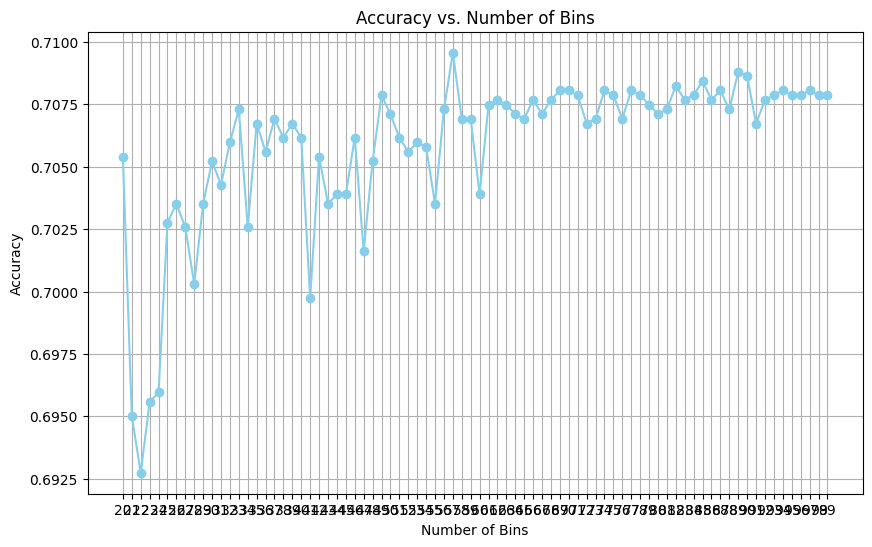

In [108]:
exp6 = train.drop(columns=['FLAG_MOBIL'])
exp6.loc[exp6['DAYS_EMPLOYED'] > 0, 'DAYS_EMPLOYED'] = 0
exp6['DAYS_EMPLOYED'] = abs(exp6['DAYS_EMPLOYED'])
exp6['begin_month'] = abs(exp6['begin_month'])
exp6.loc[exp6['child_num'] >= 3, 'child_num'] = 3

def bin_DAYS_EMPLOYED(income):
    bins = pd.cut(income, bins=54, labels=False)
    return bins

# 'DAYS_EMPLOYED' 열을 54개의 구간으로 나눈 결과를 'DAYS_EMPLOYED_cat' 열에 추가
exp6['DAYS_EMPLOYED_cat'] = bin_DAYS_EMPLOYED(exp6['DAYS_EMPLOYED'])
exp6 = exp6.drop(columns=['DAYS_EMPLOYED'])

# 정확도와 bins 값을 저장할 리스트
accuracies = []
bins_values = []

for num_bins in range(20, 100):
    try:
        exp6_copy = exp6.copy()  # 기존 exp6 데이터를 복사하여 사용

        def bin_begin_month(income):
            bins = pd.cut(income, bins=num_bins, labels=False)
            return bins

        exp6_copy['begin_month_cat'] = bin_begin_month(exp6_copy['begin_month'])
        exp6_copy = exp6_copy.drop(columns=['begin_month'])

        most_common_occyp = exp6_copy.groupby('begin_month_cat')['occyp_type'].apply(lambda x: x.mode().iloc[0])

        for begin_month_cat, occyp in most_common_occyp.items():
            exp6_copy.loc[exp6_copy['begin_month_cat'] == begin_month_cat, 'occyp_type'] = exp6_copy.loc[exp6_copy['begin_month_cat'] == begin_month_cat, 'occyp_type'].fillna(occyp)

        object_cols = exp6_copy.select_dtypes(include=['object']).columns

        le = LabelEncoder()
        for col in object_cols:
            exp6_copy[col] = le.fit_transform(exp6_copy[col])

        X = exp6_copy.drop('credit', axis=1)
        y = exp6_copy['credit']

        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        model = RandomForestClassifier(random_state=42)
        model.fit(X_train, y_train)

        y_pred = model.predict(X_test)

        accuracy = accuracy_score(y_test, y_pred)
        accuracies.append(accuracy)
        bins_values.append(num_bins)
        print(f"bins={num_bins}: Accuracy={accuracy}")
    except IndexError as e:
        print(f"bins={num_bins}: Error - {e}")

# 정확도를 시각화합니다.
plt.figure(figsize=(10, 6))
plt.plot(bins_values, accuracies, marker='o', color='skyblue')  # 예쁜 색상 설정 (skyblue)
plt.xlabel('Number of Bins')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Number of Bins')
plt.xticks(bins_values)  # x축에 모든 숫자 표시
plt.grid(True)
plt.show()

#bins=57: Accuracy=0.7095

최소화한 전처리에서 최고치

bins=20: Accuracy=0.6984126984126984
bins=21: Accuracy=0.6925547996976569
bins=22: Accuracy=0.6950113378684807
bins=23: Accuracy=0.6946334089191232
bins=24: Accuracy=0.7044595616024187
bins=25: Accuracy=0.7037037037037037
bins=26: Accuracy=0.7031368102796675
bins=27: Accuracy=0.7018140589569161
bins=28: Accuracy=0.7018140589569161
bins=29: Accuracy=0.70275888133031
bins=30: Accuracy=0.7033257747543462
bins=31: Accuracy=0.7021919879062736
bins=32: Accuracy=0.7074829931972789
bins=33: Accuracy=0.7063492063492064
bins=34: Accuracy=0.7074829931972789
bins=35: Accuracy=0.7033257747543462
bins=36: Accuracy=0.7074829931972789
bins=37: Accuracy=0.7048374905517762
bins=38: Accuracy=0.705026455026455
bins=39: Accuracy=0.7044595616024187
bins=40: Accuracy=0.7016250944822373
bins=41: Accuracy=0.7038926681783825
bins=42: Accuracy=0.70427059712774
bins=43: Accuracy=0.7048374905517762
bins=44: Accuracy=0.7054043839758125
bins=45: Accuracy=0.7040816326530612
bins=46: Accuracy=0.7052154195011338
bins=4

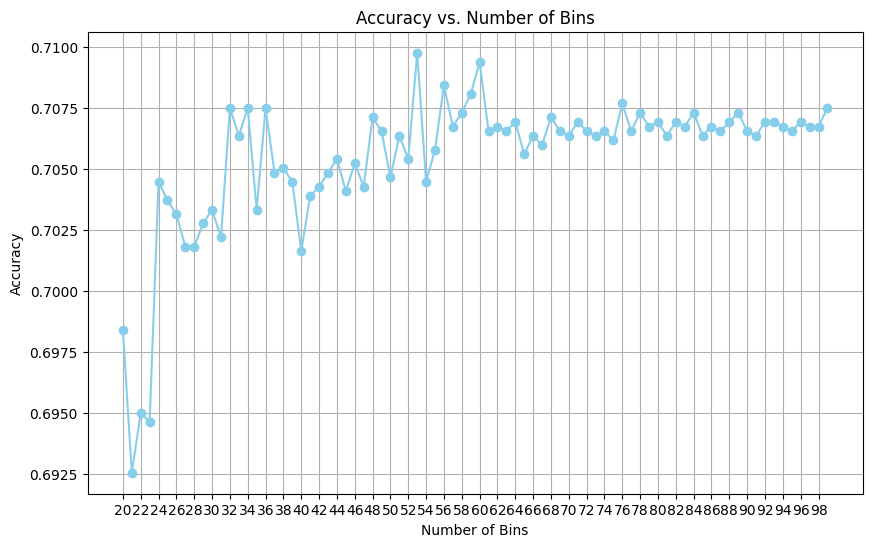

In [114]:
exp6 = train.drop(columns=['FLAG_MOBIL'])
exp6.loc[exp6['DAYS_EMPLOYED'] > 0, 'DAYS_EMPLOYED'] = 0
# exp6['DAYS_EMPLOYED'] = abs(exp6['DAYS_EMPLOYED'])
# exp6['begin_month'] = abs(exp6['begin_month'])
# exp6.loc[exp6['child_num'] >= 3, 'child_num'] = 3

def bin_DAYS_EMPLOYED(income):
    bins = pd.cut(income, bins=50, labels=False)
    return bins

# 'DAYS_EMPLOYED' 열을 50개의 구간으로 나눈 결과를 'DAYS_EMPLOYED_cat' 열에 추가
exp6['DAYS_EMPLOYED_cat'] = bin_DAYS_EMPLOYED(exp6['DAYS_EMPLOYED'])
exp6 = exp6.drop(columns=['DAYS_EMPLOYED'])

# 정확도와 bins 값을 저장할 리스트
accuracies = []
bins_values = []

for num_bins in range(20, 100):
    try:
        exp6_copy = exp6.copy()  # 기존 exp6 데이터를 복사하여 사용

        def bin_begin_month(income):
            bins = pd.cut(income, bins=num_bins, labels=False)
            return bins

        exp6_copy['begin_month_cat'] = bin_begin_month(exp6_copy['begin_month'])
        exp6_copy = exp6_copy.drop(columns=['begin_month'])

        most_common_occyp = exp6_copy.groupby('begin_month_cat')['occyp_type'].apply(lambda x: x.mode().iloc[0])

        for begin_month_cat, occyp in most_common_occyp.items():
            exp6_copy.loc[exp6_copy['begin_month_cat'] == begin_month_cat, 'occyp_type'] = exp6_copy.loc[exp6_copy['begin_month_cat'] == begin_month_cat, 'occyp_type'].fillna(occyp)

        object_cols = exp6_copy.select_dtypes(include=['object']).columns

        le = LabelEncoder()
        for col in object_cols:
            exp6_copy[col] = le.fit_transform(exp6_copy[col])

        X = exp6_copy.drop('credit', axis=1)
        y = exp6_copy['credit']

        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        model = RandomForestClassifier(random_state=42)
        model.fit(X_train, y_train)

        y_pred = model.predict(X_test)

        accuracy = accuracy_score(y_test, y_pred)
        accuracies.append(accuracy)
        bins_values.append(num_bins)
        print(f"bins={num_bins}: Accuracy={accuracy}")
    except IndexError as e:
        print(f"bins={num_bins}: Error - {e}")

# 정확도를 시각화합니다.
plt.figure(figsize=(10, 6))
plt.plot(bins_values, accuracies, marker='o', color='skyblue')
plt.xlabel('Number of Bins')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Number of Bins')
plt.xticks(bins_values[::2])  # x축에 눈금을 2 단위로 설정
plt.grid(True)
plt.show()

#

In [ ]:
# begin_month 전처리 방식별로 가장 잘 나왔던 46구간/55구간으로 고정하고 근무일수를 실험

bins=40: Error - single positional indexer is out-of-bounds
bins=41: Error - single positional indexer is out-of-bounds
bins=42: Error - single positional indexer is out-of-bounds
bins=43: Error - single positional indexer is out-of-bounds
bins=44: Error - single positional indexer is out-of-bounds
bins=45: Error - single positional indexer is out-of-bounds
bins=46: Error - single positional indexer is out-of-bounds
bins=47: Error - single positional indexer is out-of-bounds
bins=48: Error - single positional indexer is out-of-bounds
bins=49: Error - single positional indexer is out-of-bounds
bins=50: Accuracy=0.7086167800453514
bins=51: Accuracy=0.7069160997732427
bins=52: Accuracy=0.705026455026455
bins=53: Accuracy=0.70427059712774
bins=54: Accuracy=0.7076719576719577
bins=55: Accuracy=0.7074829931972789
bins=56: Accuracy=0.7088057445200302
bins=57: Accuracy=0.7076719576719577
bins=58: Error - single positional indexer is out-of-bounds
bins=59: Error - single positional indexer is o

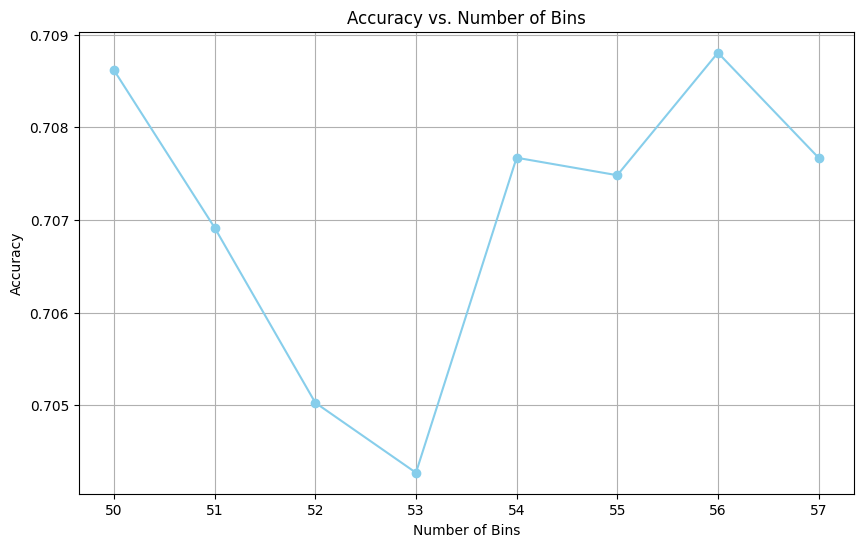

In [115]:
exp6 = train.drop(columns=['FLAG_MOBIL'])
exp6.loc[exp6['DAYS_EMPLOYED'] > 0, 'DAYS_EMPLOYED'] = 0
exp6['DAYS_EMPLOYED'] = abs(exp6['DAYS_EMPLOYED'])
exp6['begin_month'] = abs(exp6['begin_month'])
exp6.loc[exp6['child_num'] >= 3, 'child_num'] = 3

def bin_begin_month(income):
    bins = pd.cut(income, bins=46, labels=False)
    return bins

# 'begin_month' 열을 46개의 구간으로 나눈 결과를 'begin_month_cat' 열에 추가
exp6['begin_month_cat'] = bin_begin_month(exp6['begin_month'])
exp6 = exp6.drop(columns=['begin_month'])

# 정확도와 bins 값을 저장할 리스트
accuracies = []
bins_values = []

for num_bins in range(40, 60):
    try:
        exp6_copy = exp6.copy()  # 기존 exp6 데이터를 복사하여 사용

        def bin_DAYS_EMPLOYED(income):
            bins = pd.cut(income, bins=num_bins, labels=False)
            return bins

        exp6_copy['DAYS_EMPLOYED_cat'] = bin_DAYS_EMPLOYED(exp6_copy['DAYS_EMPLOYED'])
        exp6_copy = exp6_copy.drop(columns=['DAYS_EMPLOYED'])

        most_common_occyp = exp6_copy.groupby('DAYS_EMPLOYED_cat')['occyp_type'].apply(lambda x: x.mode().iloc[0])

        for DAYS_EMPLOYED_cat, occyp in most_common_occyp.items():
            exp6_copy.loc[exp6_copy['DAYS_EMPLOYED_cat'] == DAYS_EMPLOYED_cat, 'occyp_type'] = exp6_copy.loc[exp6_copy['begin_month_cat'] == begin_month_cat, 'occyp_type'].fillna(occyp)

        object_cols = exp6_copy.select_dtypes(include=['object']).columns

        le = LabelEncoder()
        for col in object_cols:
            exp6_copy[col] = le.fit_transform(exp6_copy[col])

        X = exp6_copy.drop('credit', axis=1)
        y = exp6_copy['credit']

        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        model = RandomForestClassifier(random_state=42)
        model.fit(X_train, y_train)

        y_pred = model.predict(X_test)

        accuracy = accuracy_score(y_test, y_pred)
        accuracies.append(accuracy)
        bins_values.append(num_bins)
        print(f"bins={num_bins}: Accuracy={accuracy}")
    except IndexError as e:
        print(f"bins={num_bins}: Error - {e}")

# 정확도를 시각화합니다.
plt.figure(figsize=(10, 6))
plt.plot(bins_values, accuracies, marker='o', color='skyblue')  # lavender
plt.xlabel('Number of Bins')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Number of Bins')
plt.xticks(bins_values)  # x축에 모든 숫자 표시
plt.grid(True)
plt.show()

#bins=56: Accuracy=0.7088

bins=40: Error - single positional indexer is out-of-bounds
bins=41: Error - single positional indexer is out-of-bounds
bins=42: Error - single positional indexer is out-of-bounds
bins=43: Error - single positional indexer is out-of-bounds
bins=44: Error - single positional indexer is out-of-bounds
bins=45: Error - single positional indexer is out-of-bounds
bins=46: Error - single positional indexer is out-of-bounds
bins=47: Error - single positional indexer is out-of-bounds
bins=48: Error - single positional indexer is out-of-bounds
bins=49: Error - single positional indexer is out-of-bounds
bins=50: Accuracy=0.7093726379440665
bins=51: Accuracy=0.7072940287226002
bins=52: Accuracy=0.7061602418745276
bins=53: Accuracy=0.7063492063492064
bins=54: Accuracy=0.7033257747543462
bins=55: Accuracy=0.7071050642479214
bins=56: Accuracy=0.7052154195011338
bins=57: Accuracy=0.7067271352985639
bins=58: Error - single positional indexer is out-of-bounds
bins=59: Error - single positional indexer i

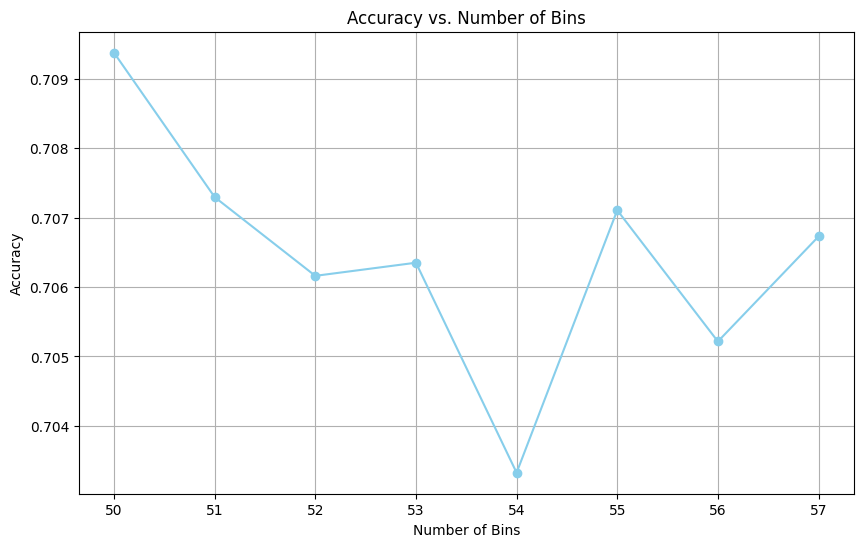

In [116]:
exp6 = train.drop(columns=['FLAG_MOBIL'])
exp6.loc[exp6['DAYS_EMPLOYED'] > 0, 'DAYS_EMPLOYED'] = 0
# exp6['DAYS_EMPLOYED'] = abs(exp6['DAYS_EMPLOYED'])
# exp6['begin_month'] = abs(exp6['begin_month'])
# exp6.loc[exp6['child_num'] >= 3, 'child_num'] = 3

def bin_begin_month(income):
    bins = pd.cut(income, bins=55, labels=False)
    return bins

# 'begin_month' 열을 55개의 구간으로 나눈 결과를 'begin_month_cat' 열에 추가
exp6['begin_month_cat'] = bin_begin_month(exp6['begin_month'])
exp6 = exp6.drop(columns=['begin_month'])

# 정확도와 bins 값을 저장할 리스트
accuracies = []
bins_values = []

for num_bins in range(40, 60):
    try:
        exp6_copy = exp6.copy()  # 기존 exp6 데이터를 복사하여 사용

        def bin_DAYS_EMPLOYED(income):
            bins = pd.cut(income, bins=num_bins, labels=False)
            return bins

        exp6_copy['DAYS_EMPLOYED_cat'] = bin_DAYS_EMPLOYED(exp6_copy['DAYS_EMPLOYED'])
        exp6_copy = exp6_copy.drop(columns=['DAYS_EMPLOYED'])

        most_common_occyp = exp6_copy.groupby('DAYS_EMPLOYED_cat')['occyp_type'].apply(lambda x: x.mode().iloc[0])

        for DAYS_EMPLOYED_cat, occyp in most_common_occyp.items():
            exp6_copy.loc[exp6_copy['DAYS_EMPLOYED_cat'] == DAYS_EMPLOYED_cat, 'occyp_type'] = exp6_copy.loc[exp6_copy['begin_month_cat'] == begin_month_cat, 'occyp_type'].fillna(occyp)

        object_cols = exp6_copy.select_dtypes(include=['object']).columns

        le = LabelEncoder()
        for col in object_cols:
            exp6_copy[col] = le.fit_transform(exp6_copy[col])

        X = exp6_copy.drop('credit', axis=1)
        y = exp6_copy['credit']

        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        model = RandomForestClassifier(random_state=42)
        model.fit(X_train, y_train)

        y_pred = model.predict(X_test)

        accuracy = accuracy_score(y_test, y_pred)
        accuracies.append(accuracy)
        bins_values.append(num_bins)
        print(f"bins={num_bins}: Accuracy={accuracy}")
    except IndexError as e:
        print(f"bins={num_bins}: Error - {e}")

# 정확도를 시각화합니다.
plt.figure(figsize=(10, 6))
plt.plot(bins_values, accuracies, marker='o', color='skyblue')  # lavender
plt.xlabel('Number of Bins')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Number of Bins')
plt.xticks(bins_values)  # x축에 모든 숫자 표시
plt.grid(True)
plt.show()

#bins=50: Accuracy=0.7093

##최종 모델 - 최고 성능

- FLAG_MOBIL 삭제
- DAYS_EMPLOYED 양수인 것은 0으로 대체
- begin_month는 구간화하지 않음
- DAYS_EMPLOYED는 50구간으로 채움
- DAYS_EMPLOYED 구간별 occyp_type 최빈값으로 결측치 채워줌

In [117]:
exp = train.drop(columns = ['FLAG_MOBIL'])
exp.loc[exp['DAYS_EMPLOYED'] > 0, 'DAYS_EMPLOYED'] = 0


def bin_DAYS_EMPLOYED(income):
    bins = pd.cut(income, bins=50, labels=False)
    return bins

# 'DAYS_EMPLOYED' 열을 50개의 구간으로 나눈 결과를 'DAYS_EMPLOYED_cat' 열에 추가
exp['DAYS_EMPLOYED_cat'] = bin_DAYS_EMPLOYED(exp['DAYS_EMPLOYED'])
exp = exp.drop(columns=['DAYS_EMPLOYED'])

# 각 'DAYS_EMPLOYED_cat'별 가장 빈도가 높은 직업(occyp_type)을 계산
most_common_occyp = exp.groupby('DAYS_EMPLOYED_cat')['occyp_type'].apply(lambda x: x.mode().iloc[0])

# 결측치를 해당 'DAYS_EMPLOYED_cat'별 가장 빈도가 높은 직업으로 대체
for DAYS_EMPLOYED_cat, occyp in most_common_occyp.items():
    exp.loc[exp['DAYS_EMPLOYED_cat'] == DAYS_EMPLOYED_cat, 'occyp_type'] = exp.loc[exp['DAYS_EMPLOYED_cat'] == DAYS_EMPLOYED_cat, 'occyp_type'].fillna(occyp)

# 모든 object 열을 숫자로 변환
object_cols = exp.select_dtypes(include=['object']).columns

le = LabelEncoder()
for col in object_cols:
    exp[col] = le.fit_transform(exp[col])

# 데이터를 특성(features)과 레이블로 나눔
X = exp.drop('credit', axis=1)
y = exp['credit']

# 학습 데이터와 테스트 데이터로 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 모델을 초기화하고 학습
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# 학습된 모델을 사용하여 예측을 수행
y_pred = model.predict(X_test)

# 모델의 성능을 평가
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7123960695389266


## LGBM

bins=40: Accuracy=0.7061602418745276
bins=41: Accuracy=0.6997354497354498
bins=42: Accuracy=0.7054043839758125
bins=43: Accuracy=0.703514739229025
bins=44: Accuracy=0.7038926681783825
bins=45: Accuracy=0.7038926681783825
bins=46: Accuracy=0.7061602418745276
bins=47: Accuracy=0.7016250944822373
bins=48: Accuracy=0.7052154195011338
bins=49: Accuracy=0.7078609221466364
bins=50: Accuracy=0.7071050642479214
bins=51: Accuracy=0.7061602418745276
bins=52: Accuracy=0.7055933484504913
bins=53: Accuracy=0.7059712773998488
bins=54: Accuracy=0.70578231292517
bins=55: Accuracy=0.703514739229025
bins=56: Accuracy=0.7072940287226002
bins=57: Accuracy=0.7095616024187453
bins=58: Accuracy=0.7069160997732427
bins=59: Accuracy=0.7069160997732427
bins=60: Accuracy=0.7038926681783825
bins=61: Accuracy=0.7074829931972789
bins=62: Accuracy=0.7076719576719577
bins=63: Accuracy=0.7074829931972789
bins=64: Accuracy=0.7071050642479214
bins=65: Accuracy=0.7069160997732427
bins=66: Accuracy=0.7076719576719577
bins=

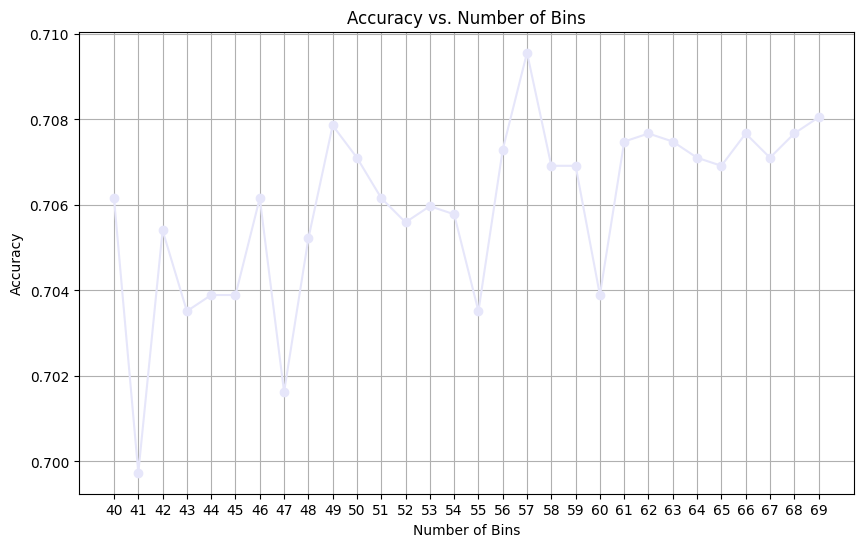

In [119]:
exp6 = train.drop(columns=['FLAG_MOBIL'])
exp6.loc[exp6['DAYS_EMPLOYED'] > 0, 'DAYS_EMPLOYED'] = 0
exp6['DAYS_EMPLOYED'] = abs(exp6['DAYS_EMPLOYED'])
exp6['begin_month'] = abs(exp6['begin_month'])
exp6.loc[exp6['child_num'] >= 3, 'child_num'] = 3

def bin_DAYS_EMPLOYED(days):
    bins = pd.cut(days, bins=54, labels=False)
    return bins

# 'DAYS_EMPLOYED' 열을 54개의 구간으로 나눈 결과를 'DAYS_EMPLOYED_cat' 열에 추가
exp6['DAYS_EMPLOYED_cat'] = bin_DAYS_EMPLOYED(exp6['DAYS_EMPLOYED'])
exp6 = exp6.drop(columns=['DAYS_EMPLOYED'])

# 정확도와 bins 값을 저장할 리스트
accuracies = []
bins_values = []

for num_bins in range(40, 70):
    try:
        exp6_copy = exp6.copy()  # 기존 exp6 데이터를 복사하여 사용

        def bin_begin_month(month):
            bins = pd.cut(month, bins=num_bins, labels=False)
            return bins

        exp6_copy['begin_month_cat'] = bin_begin_month(exp6_copy['begin_month'])
        exp6_copy = exp6_copy.drop(columns=['begin_month'])

        most_common_occyp = exp6_copy.groupby('begin_month_cat')['occyp_type'].apply(lambda x: x.mode().iloc[0])

        for begin_month_cat, occyp in most_common_occyp.items():
            exp6_copy.loc[exp6_copy['begin_month_cat'] == begin_month_cat, 'occyp_type'] = exp6_copy.loc[exp6_copy['begin_month_cat'] == begin_month_cat, 'occyp_type'].fillna(occyp)

        object_cols = exp6_copy.select_dtypes(include=['object']).columns

        le = LabelEncoder()
        for col in object_cols:
            exp6_copy[col] = le.fit_transform(exp6_copy[col])

        X = exp6_copy.drop('credit', axis=1)
        y = exp6_copy['credit']

        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        model = RandomForestClassifier(random_state=42)
        model.fit(X_train, y_train)

        y_pred = model.predict(X_test)

        accuracy = accuracy_score(y_test, y_pred)
        accuracies.append(accuracy)
        bins_values.append(num_bins)
        print(f"bins={num_bins}: Accuracy={accuracy}")
    except IndexError as e:
        print(f"bins={num_bins}: Error - {e}")

# 정확도를 시각화합니다.
plt.figure(figsize=(10, 6))
plt.plot(bins_values, accuracies, marker='o', color='lavender')  # 예쁜 색상 설정 (skyblue)
plt.xlabel('Number of Bins')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Number of Bins')
plt.xticks(bins_values)  # x축에 모든 숫자 표시
plt.grid(True)
plt.show()

# 치운님의 최종 모델 응용

In [6]:
df = train.drop(columns = ['FLAG_MOBIL'])

# ID 열 생성
add_columns = ['gender', 'car', 'reality', 'income_type', 'edu_type', 'family_type',
       'house_type', 'occyp_type', 'work_phone', 'email', 'DAYS_BIRTH', 'child_num', 'DAYS_EMPLOYED']
df['ID'] = df[add_columns].astype(str).apply(lambda x: '_'.join(x), axis=1)
# test['ID'] = test[add_columns].astype(str).apply(lambda x: '_'.join(x), axis=1)

# 일한 일수 양수는 일하지 않았다고 보고 0으로 변경
df['DAYS_EMPLOYED'] = df['DAYS_EMPLOYED'].apply(lambda x: 0 if x > 0 else x)
# test['DAYS_EMPLOYED'] = test['DAYS_EMPLOYED'].apply(lambda x: 0 if x > 0 else x)

# 음수값 양수값으로 변경
features = ['DAYS_BIRTH', 'DAYS_EMPLOYED', 'begin_month']
for f in features:
    df[f] = df[f].abs()
    # test[f] = test[f].abs()

# 안쓰면 71.3 ↓ 0.4
# 일 안한 날 생성
df["No_work"] = df["DAYS_BIRTH"] - df['DAYS_EMPLOYED']
# test["No_work"] = test["DAYS_BIRTH"] - test['DAYS_EMPLOYED']

# 연으로 변경
df["BIRTH_y"] = df["DAYS_BIRTH"] / 365
df['EMPLOYED_y'] = df['DAYS_EMPLOYED'] / 365
df["No_work_y"] = df["No_work"] / 365
# test["BIRTH_y"] = test["DAYS_BIRTH"] / 365
# test['EMPLOYED_y'] = test['DAYS_EMPLOYED'] / 365
# test["No_work_y"] = test["No_work"] / 365

# 달로 변경
df["BIRTH_m"] = np.floor(df['DAYS_BIRTH'] / 30) - ((np.floor(df['DAYS_BIRTH'] / 30) / 12).astype(int) * 12)
df['EMPLOYED_m'] = np.floor(df['DAYS_EMPLOYED'] / 30) - ((np.floor(df['DAYS_EMPLOYED'] / 30) / 12).astype(int) * 12)
df["No_work_m"] = np.floor(df['No_work'] / 30) - ((np.floor(df['No_work'] / 30) / 12).astype(int) * 12)
# test["BIRTH_m"] = np.floor(test['DAYS_BIRTH'] / 30) - ((np.floor(test['DAYS_BIRTH'] / 30) / 12).astype(int) * 12)
# test['EMPLOYED_m'] = np.floor(test['DAYS_EMPLOYED'] / 30) - ((np.floor(test['DAYS_EMPLOYED'] / 30) / 12).astype(int) * 12)
# test["No_work_m"] = np.floor(test['No_work'] / 30) - ((np.floor(test['No_work'] / 30) / 12).astype(int) * 12)

# 주로 변경
df["BIRTH_w"] =  np.floor(df['DAYS_BIRTH'] / 7) - ((np.floor(df['DAYS_BIRTH'] / 7) / 4).astype(int) * 4)
df["EMPLOYED_w"] =  np.floor(df['DAYS_EMPLOYED'] / 7) - ((np.floor(df['DAYS_EMPLOYED'] / 7) / 4).astype(int) * 4)
df["No_work_w"] =  np.floor(df['No_work'] / 7) - ((np.floor(df['No_work'] / 7) / 4).astype(int) * 4)
# test["BIRTH_w"] =  np.floor(test['DAYS_BIRTH'] / 7) - ((np.floor(test['DAYS_BIRTH'] / 7) / 4).astype(int) * 4)
# test["EMPLOYED_w"] =  np.floor(test['DAYS_EMPLOYED'] / 7) - ((np.floor(test['DAYS_EMPLOYED'] / 7) / 4).astype(int) * 4)
# test["No_work_w"] =  np.floor(test['No_work'] / 7) - ((np.floor(test['No_work'] / 7) / 4).astype(int) * 4)

# 전화 하나로 변경
df['phones'] = df.loc[:, 'work_phone':'phone'].sum(axis = 1)
df = df.drop(['work_phone', 'phone'], axis=1)

# test['phones'] = test.loc[:, 'work_phone':'phone'].sum(axis = 1)
# test = test.drop(['work_phone', 'phone'], axis=1)

# 연소득
df['income_year'] = df['income_total'] / 365
# test['income_year'] = test['income_total'] / 365

# 소득 (살아온 일수(나이) + 근무일수) : 나이가 많고 근무일수가 높을 수록 소득이 높을 것이다
df['income'] = df['income_total'] / ((df['DAYS_BIRTH'] + df['DAYS_EMPLOYED']))
# test['income'] = test['income_total'] / ((test['DAYS_BIRTH'] + test['DAYS_EMPLOYED']))

# 가족 수로 수입 나눔 : 가족이 많으면 지출이 많을 것이다
df['income_famliy'] = df['income_total'] / df['family_size']
# test['income_famliy'] = test['income_total'] / test['family_size']

# 연관없는 것을 합쳐보자
# car+email (RF 71.8  ↑ 0.1)
df['car_email'] = df.loc[:, 'car':'email'].sum(axis = 1)
df = df.drop(['car', 'email'], axis=1)

# test['car_email'] = test.loc[:, 'car':'email'].sum(axis = 1)
# test = test.drop(['car', 'email'], axis=1)

def bin_DAYS_EMPLOYED(income):
    bins = pd.cut(income, bins=54, labels=False)
    return bins

# 'DAYS_EMPLOYED' 열을 50개의 구간으로 나눈 결과를 'DAYS_EMPLOYED_cat' 열에 추가
df['DAYS_EMPLOYED_cat'] = bin_DAYS_EMPLOYED(df['DAYS_EMPLOYED'])
df = df.drop(columns=['DAYS_EMPLOYED'])

# 각 'DAYS_EMPLOYED_cat'별 가장 빈도가 높은 직업(occyp_type)을 계산
most_common_occyp = df.groupby('DAYS_EMPLOYED_cat')['occyp_type'].apply(lambda x: x.mode().iloc[0])

# 결측치를 해당 'DAYS_EMPLOYED_cat'별 가장 빈도가 높은 직업으로 대체
for DAYS_EMPLOYED_cat, occyp in most_common_occyp.items():
    df.loc[df['DAYS_EMPLOYED_cat'] == DAYS_EMPLOYED_cat, 'occyp_type'] = df.loc[df['DAYS_EMPLOYED_cat'] == DAYS_EMPLOYED_cat, 'occyp_type'].fillna(occyp)

# 다 나눴으면 삭제합시다
# df = df.drop(['DAYS_EMPLOYED','DAYS_BIRTH','child_num'], axis=1)
# test = test.drop(['DAYS_EMPLOYED','DAYS_BIRTH','child_num'], axis=1)


# # object열 확인하기
# # object_columns = df.select_dtypes(include='object').columns
# object_columns = df.dtypes[df.dtypes == "object"].index.tolist()
# print(object_columns)

# # object열 인코딩하기 (label은 오류나서 OrdinalEncoder로 진행)
# from sklearn.preprocessing import OrdinalEncoder
# ordinal_encoder = OrdinalEncoder()
# df[object_columns] = ordinal_encoder.fit_transform(df[object_columns], df['credit'])
# # test[object_columns] = ordinal_encoder.fit_transform(test[object_columns])

# # ID 값은 int 값으로 변경
# df['ID'] = df['ID'].astype(int)
# test['ID'] = test['ID'].astype(int)

# 모든 object 열을 숫자로 변환합니다.
object_cols = df.select_dtypes(include=['object']).columns

le = LabelEncoder()
for col in object_cols:
    df[col] = le.fit_transform(df[col])

# 데이터를 특성(features)과 레이블로 나눕니다.
X = df.drop('credit', axis=1)
y = df['credit']

# 학습 데이터와 테스트 데이터로 분할합니다.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 모델을 초기화하고 학습시킵니다.
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# 학습된 모델을 사용하여 예측을 수행합니다.
y_pred = model.predict(X_test)

# 모델의 성능을 평가합니다.
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

#인덱스 그대로 둘 시: 0.7152305366591081

Accuracy: 0.7152305366591081
